## Docker
docker run -d -p 8888:8888 -p 6006:6006 -v /home/user:/root/shared -runtime=nvidia vovacher/dl3:gpu

docker rmi $(docker images -q --filter "dangling=true")


## Pick a GPU to work on (make sure it is free!)

Notice how it grabs all the GPU memory immediately (eventhough it has done nothing so far)

In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1", "2", "3"
os.environ["CUDA_VISIBLE_DEVICES"]="1" 
 
# Do other imports now...
import keras


In [2]:
!pip install pydot


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install graphviz

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


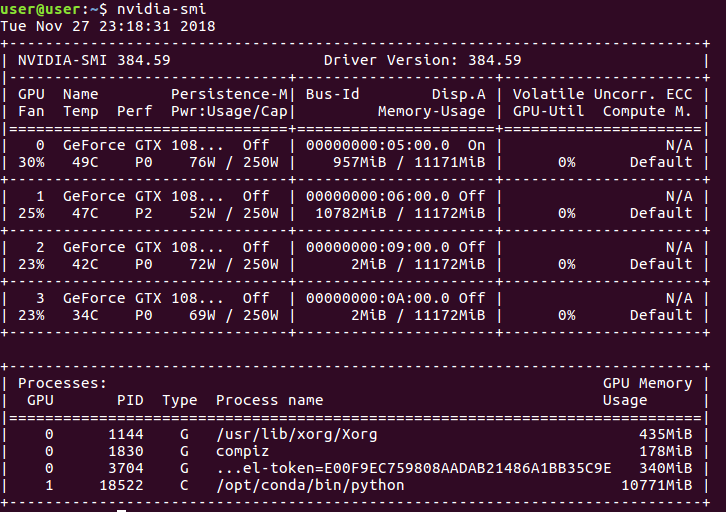

Make sure to load up the GPUs (push their utility up!

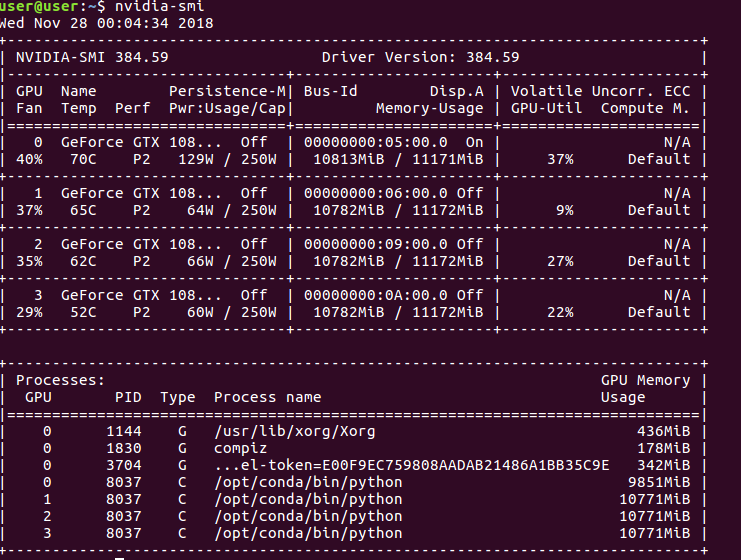

## Release GPUs' memory (so others can use them!)

If you have a separate notebook running you might the GPUs. The following command releases the memory in the GPUs.

`K.clear_session()`



## Which GPU am I using?

To check if you really are utilizing all of your GPUs, specifically NVIDIA ones, you can monitor your usage in the terminal using:

`watch -n0.5 nvidia-smi`

In [10]:
#Check the GPUs
!nvidia-smi

Wed Dec 12 16:54:46 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 000086EB:00:00.0 Off |                    0 |
| N/A   38C    P8    27W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Train Alexnet on CIFAR 10
In 2012, the deep learning networks created by Alex Krizhevsky, Geoffrey Hinton and Ilya Sutskever (now largely know as AlexNet) blew everyone out of the water to win Image Classification Challenge (ILSVRC). This heralded the new era of deep learning. AlexNet is the most influential modern deep learning networks in machine vision that use multiple convolutional and dense layers and distributed computing with GPU.

Like LeNet-5, AlexNet is one of the most important & influential neural network architectures that demonstrate the power of convolutional layers in machine vision. So, let’s build AlexNet with Keras first, them move onto building it in 

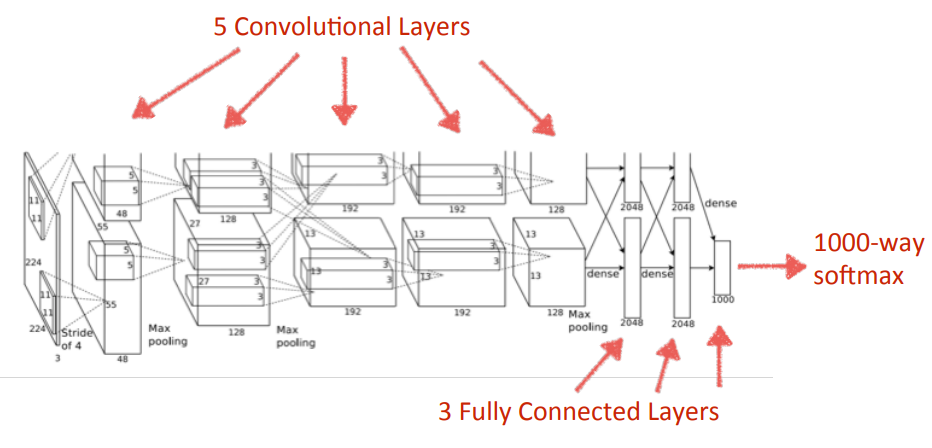

## AlexNet in Keras

Here we make a few changes in order to simplify a few things and further optimise the training outcome. 
* First of all, we use the sequential model and eliminating the parallelism for simplification. 
  * For example, the first convolutional layer had 2 layers with 48 neurons each. Instead, we combine it to 98 neurons.
* The original architecture did not have batch normalisation after every layer (although it had normalisation between a few layers) and dropouts. Here we put a batch normalisation layer before the input after every layer and dropouts between the fully-connected layers to reduce overfitting.
  * When to use batch normalisation is difficult. Everyone seems to have opinions or evidence that supports their opinions. Without going into too much details, I decided to normalise before the input as it seems to make sense statistically.
  
  

## Task Train AlexNet model on Cifar10 data
Using the  code provided below as a basis, please specify AlexNet using the Functional API (as opposed to the sequential API) and train it on the Cifar10 dataset which introduced below. 

### Summarize  your network
Summarize your network using the following:
1. Summarize your Model using:  
`from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())`
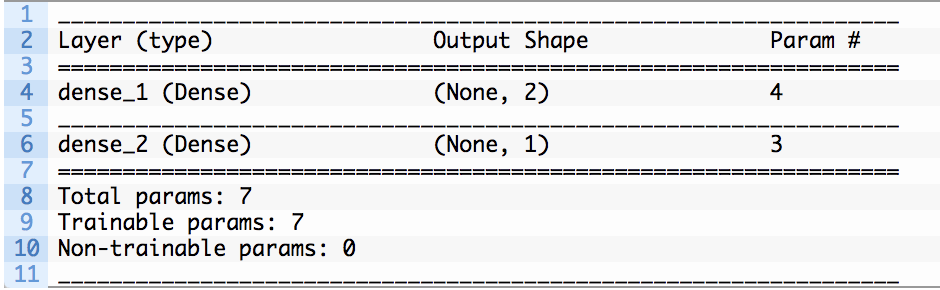


### Visualize your model
* Visualize  your model as follows:

`from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)`

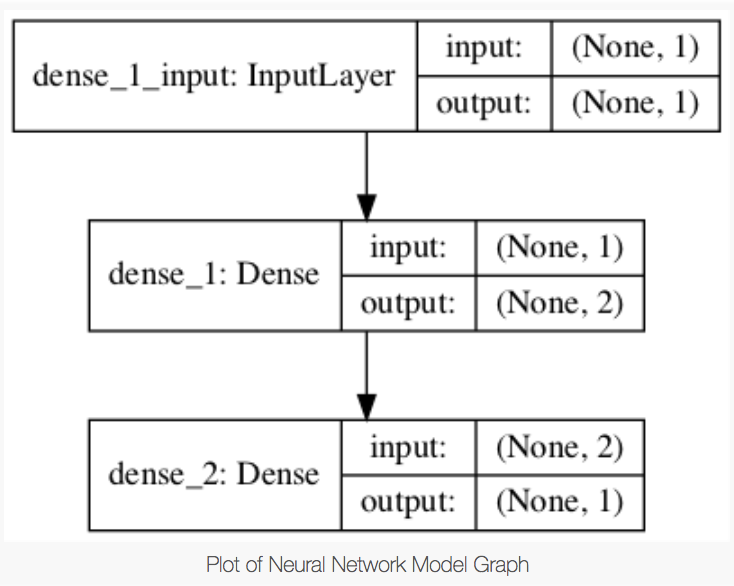

### Report your results and discuss
Please report your experimental results using the following format and discuss key findings (please try multiple experimental hyperparameter settings if time permits):

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|


In addition, produce training progress plots like the following and discuss your findings:

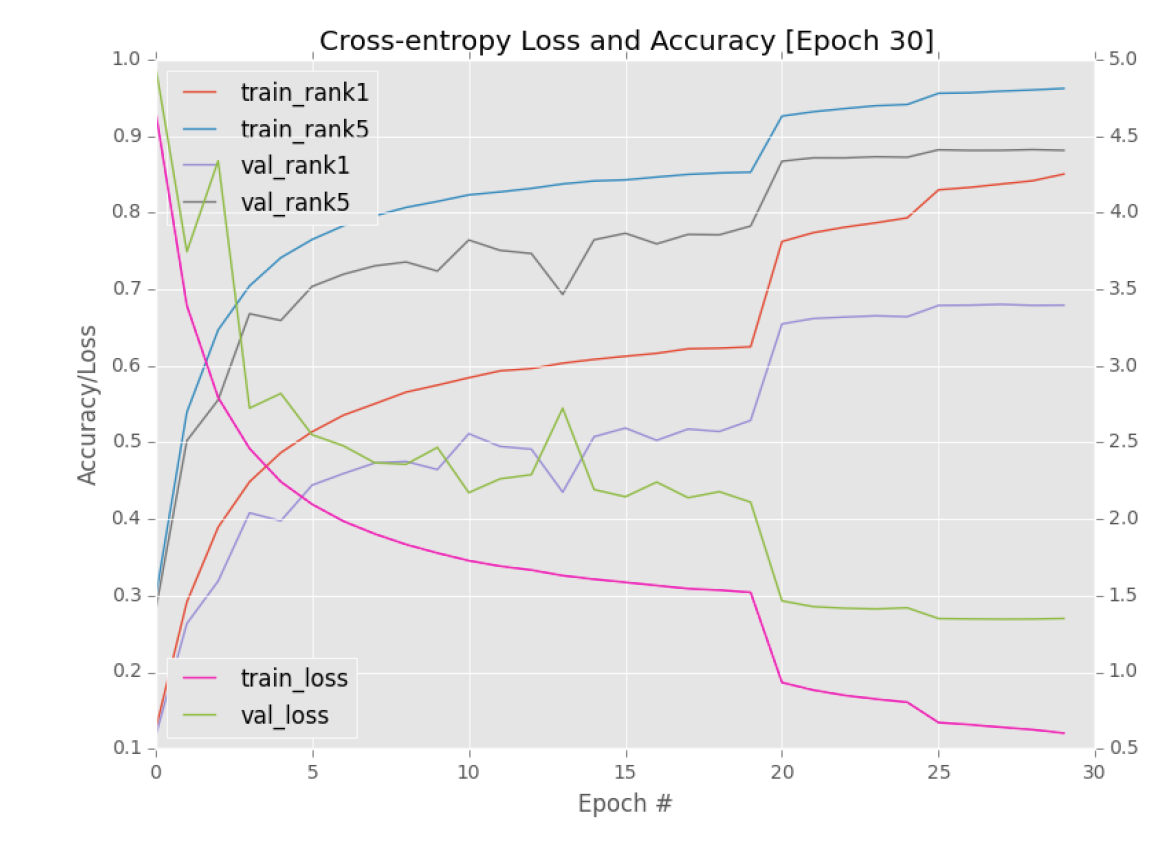

## The CIFAR-10 dataset in more detail
The goal of this exercise is to learn image classifer using the CIFAR10 dataset. This 10-class 32x32x2 image dataset which can be downloaded directly from Keras' datasets.

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:

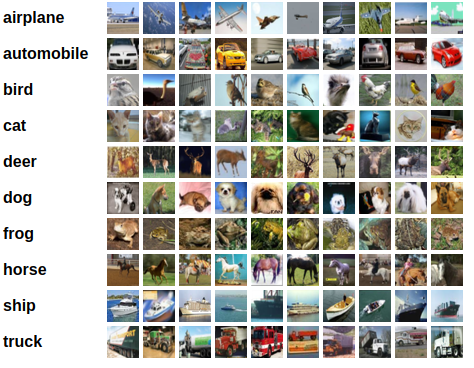

In [19]:
def display_nn_model(model, file_name):
    print(model.summary())
    plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)

## Starter Code for your task

In [20]:
# (1) Importing dependency
from __future__ import print_function
from __future__ import division

import os
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam


np.random.seed(1000)
from keras.optimizers import Adam

#global variable
nb_epoch = 10

In [7]:

# (2) Get CIFAR10 Dataset
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.
testX /= 255.

batch_size = 100
nb_classes = 10


img_rows, img_cols = 32, 32
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
# convert to one hot encoing 
y_train = keras.utils.to_categorical(trainY, nb_classes)
y_test = keras.utils.to_categorical(testY, nb_classes)

# (3) Create a sequential model
# AlexNet Define the Model
# Feature BODY - Classification HEAD
model = Sequential()
# FEATURE Body
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
# for original Alexnet 
# CIFAR10 images are only 32x32x3 and not 224x224x3 so use smaller kernel size here
# Also use 96 kernels and not 2 x 48 as in the the original e
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same',input_shape=img_dim))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())
# Convolutional Layer 3, 4, 5 
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

# CLASSIFICATION HEAD
model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


#print(model.summary())
#plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
display_nn_model(model, 'model_plot1.png')

170500096/170498071 [==============================] - 18s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3

## Visualize the architecture (RERUN to see the latest version)
(RERUN to see the latest version)
<img src="model_plot1.png" alt="Drawing" style="width: =400px;"/>


In [8]:
history = {"testLoss": [], 
           "testAccuracy": [], 
                }
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)        
        history["testLoss"].append(loss)
        history["testAccuracy"].append(acc)
        print('Testing loss: {}, acc: {}'.format(loss, acc))

Create callback to trace metrics live in TF Tensorboard

In [9]:
from keras.callbacks import ModelCheckpoint, TensorBoard
tb = TensorBoard()

Callback to save best model weights

In [10]:
import os
os.makedirs("./snapshots", exist_ok=True)
mc = ModelCheckpoint("./snapshots/cifar10_cnn_best.h5", save_best_only=True)

Train!

## Train AlexNet on my GPU

### Which GPU am I using?

In [11]:
#Check the GPUs
!nvidia-smi

Wed Dec 12 02:56:19 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 0000392A:00:00.0 Off |                    0 |
| N/A   56C    P0    55W / 149W |    116MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [12]:
%%time
from sklearn.metrics import accuracy_score

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
hist = model.fit(trainX, y_train, batch_size=64, epochs=nb_epoch, verbose=1, \
          validation_split=0.2, shuffle=True,
          callbacks=[TestCallback((testX, y_test)),tb, mc])

# Test the model
score = model.evaluate(testX, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 247s 6ms/step - loss: 2.5084 - acc: 0.2662 - val_loss: 2.7075 - val_acc: 0.2490
Testing loss: 2.698616809463501, acc: 0.2535
Epoch 2/25
40000/40000 [==============================] - 248s 6ms/step - loss: 1.9210 - acc: 0.3907 - val_loss: 2.2382 - val_acc: 0.3323
Testing loss: 2.2400740531921386, acc: 0.3326
Epoch 3/25
40000/40000 [==============================] - 248s 6ms/step - loss: 1.7321 - acc: 0.4542 - val_loss: 1.7476 - val_acc: 0.4426
Testing loss: 1.7310112331390382, acc: 0.4485
Epoch 4/25
40000/40000 [==============================] - 248s 6ms/step - loss: 1.6330 - acc: 0.4908 - val_loss: 2.3771 - val_acc: 0.3909
Testing loss: 2.350953511047363, acc: 0.39
Epoch 5/25
40000/40000 [==============================] - 247s 6ms/step - loss: 1.5727 - acc: 0.5221 - val_loss: 1.7409 - val_acc: 0.5009
Testing loss: 1.7371007034301758, acc: 0.5015
Epoch 6/25
40000/40000 [==========

In [13]:
history['testAccuracy'][-5:]

[0.6692, 0.6219, 0.6208, 0.6322, 0.61]

In [14]:
hist.history['val_acc'][-5:]

[0.6722, 0.6204, 0.6264, 0.6421, 0.6184]

## Plot learning progress

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_learning_progress(hist, imgNet):
    if len(hist.history["loss"]) > 1:
        # plot the training loss and accuracy
        N = np.arange(0, len(hist.history["loss"]))
        plt.style.use("ggplot")
        plt.figure()
        fig, ax1 = plt.subplots()
        ax1.plot(N, hist.history["loss"], "b.", label="train_loss")
        ax1.plot(N, hist.history["val_loss"], "b", label="val_loss")
        ax1.set_xlabel("Epoch #")
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('loss', color='b')
        ax1.tick_params('y', colors='b')
        color = "g"
        ax2 = ax1.twinx()
        ax2.plot(N, hist.history["acc"], color+".", label="train_acc")
        ax2.plot(N, hist.history["val_acc"], color, label="val_acc")
        plt.title("Cross entropy Loss and Accuracy [to Epoch {}]\n' + imgNet + ' trained on 4 GPUs".format(
            len(hist.history["loss"])))
        ax2.set_ylabel('Accuracy', color=color)
        ax2.tick_params('y', colors=color)

        ax1.legend()
        ax2.legend()


<Figure size 432x288 with 0 Axes>

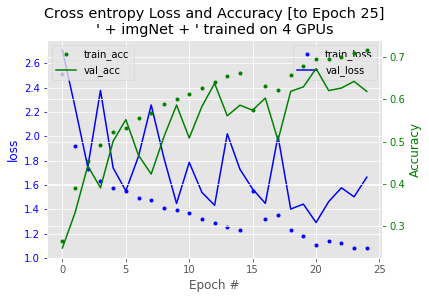

In [16]:
plot_learning_progress(hist, 'AlexNet')

## Load best model

In [17]:
#Load best model
from keras.models import Model, load_model
model = load_model("./snapshots/cifar10_cnn_best.h5")

## Visualize the confusion matrix
Lets plot confusion matrix for this CIFAR dataset.


Confusion matrix, without normalization
[[701  25 122  24  31   6   5   9  37  40]
 [ 35 822  16  12   1   2   9   6  22  75]
 [ 52  12 623  38 130  57  62  14   6   6]
 [ 19  12 122 389 136 150 132  14   7  19]
 [  6   3 114  48 730  22  46  14  13   4]
 [ 13   8 112 158  90 513  66  24   6  10]
 [  7   8  87  30  75   8 774   3   5   3]
 [ 11   8  66  36 161  95  11 584   2  26]
 [ 77  34  46  22  18   9   4   1 772  17]
 [ 39  75  20  22   7   5  14  10  24 784]]


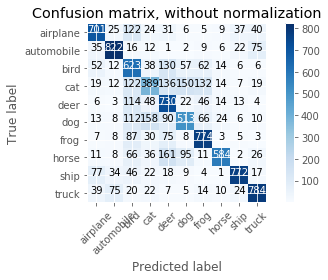

In [18]:
## Visualization of confusion matrix
#The below code takes a confusion matrix and produces a nice and shiny visualization

# import for showing the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

   
results = model.predict(testX)

# convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)

# Names of predicted classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Generate the confusion matrix
cnf_matrix = confusion_matrix(testY, predicted_classes)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Launch Tensorboard

In [ ]:
!tensorboard --logdir=./logs

# Using multiple GPUs for training 

Keras provides a clever divide and conquer strategy centred for training over multiple GPUs based on distributing each mini-batch  to the available GPUs for the gradient calculation (MAP) phase and then using  the CPU for the weight update (REDUCE).  **This induces quasi-linear speedup on up to 8 GPUs.** (on AlexNet we see a 4X speedup on 4 GPUs! It is a small dataset)

To use multiple GPUs First it replicates a model over each different GPUs using the following function:
 
    
 <pre>   
    tf.keras.utils.multi_gpu_model(
    model,
    gpus,
    cpu_merge=True,
    cpu_relocation=False
)
    </pre>
    

Specifically, this function implements single-machine multi-GPU data parallelism. It works in the following way:

* Divide the model's input(s) into multiple sub-batches.
* Apply a model copy on each sub-batch. Every model copy is executed on a dedicated GPU.
* Concatenate the results (on CPU) into one big batch.
* E.g. if your batch_size is 64 and you use gpus=2, then we will divide the input into 2 sub-batches of 32 samples, process each sub-batch on one GPU, then return the full batch of 64 processed samples.

Arguments:

* model: A Keras model instance. To avoid OOM errors, this model could have been built on CPU, for instance (see usage example below).
* gpus: Integer >= 2, number of on GPUs on which to create model replicas.
* cpu_merge: A boolean value to identify whether to force merging model weights under the scope of the CPU or not.
* cpu_relocation: A boolean value to identify whether to create the model's weights under the scope of the CPU. If the model is not defined under any preceding device scope, you can still rescue it by activating this option.

   
This function is defined  in tensorflow/python/keras/utils/multi_gpu_utils.py.

For more information see [Keras help page on this]( https://www.tensorflow.org/api_docs/python/tf/keras/utils/multi_gpu_model)

## Example of using multiple GPUs for training in code

<pre>
....... 
assemble model layers
......................
# Instantiate model.
model = Model(inputs=inputs, outputs=outputs)
#
# DISTRIBUTE training over all GPUs
# use 4 gpus to train the model
model = multi_gpu_model(model, gpus=num_gpus)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
print(model_type)

model.fit(....)
</pre>

## Train on 4 GPUs: AlexNet with no augmentation 

In [15]:
# (1) Importing dependency
from __future__ import print_function
from __future__ import division

import os
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.callbacks import ReduceLROnPlateau, TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
import numpy as np
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam

num_gpus = 1
np.random.seed(1000)

# (2) Get CIFAR10 Dataset
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.
testX /= 255.

batch_size = 64  # will multiply by  at FIT time *num_gpus 
nb_classes = 10
#nb_epoch = 100

img_rows, img_cols = 32, 32
img_channels = 3
img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
# convert to one hot encoing 
y_train = keras.utils.to_categorical(trainY, nb_classes)
y_test = keras.utils.to_categorical(testY, nb_classes)

# (3) Create a sequential model
# AlexNet Define the Model
# Feature BODY - Classification HEAD

def createAlexNet(img_dim):
    model = Sequential()
    # FEATURE Body
    # model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    # for original Alexnet 
    # CIFAR10 images are only 32x32x3 and not 224x224x3 so use smaller kernel size here
    # Also use 96 kernels and not 2 x 48 as in the the original e
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same',input_shape=img_dim))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())
    # 2nd Convolutional Layer
    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())
    # Convolutional Layer 3, 4, 5 
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    # CLASSIFICATION HEAD
    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))

    #print(model.summary())
    #plot_model(model, to_file='model_plotAlexNet.png', show_shapes=True, show_layer_names=True)
    display_nn_model(model, 'model_plotAlexNet.png')
    
    return model

### Distribution training at complie time

In [6]:
# DISTRIBUTE training over all GPUs
# use 4 gpus to train the model
from keras.utils import multi_gpu_model
import tensorflow as tf

# check to see if we are compiling using just a single GPU
if num_gpus <= 1:
    print("[INFO] training with 1 GPU...")
    model = createAlexNet(img_dim)

# otherwise, we are compiling using multiple GPUs
else:
    print("[INFO] training with {} GPUs...".format(num_gpus))

    # we'll store a copy of the model on *every* GPU and then combine
    # the results from the gradient updates on the CPU
    with tf.device("/cpu:0"):
        # initialize the model
        model = createAlexNet(img_dim)

    # make the model parallel
    model = multi_gpu_model(model, gpus=num_gpus)


#model = multi_gpu_model(model, gpus=num_gpus)
#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
#model.summary()


# (5) Train
#hist = model.fit(trainX, y_train, batch_size=64, epochs=nb_epoch, verbose=1, \
#          validation_split=0.2, shuffle=True,
#          callbacks=[TestCallback((testX, y_test)),tb, mc])


[INFO] training with 1 GPU...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 384)

In [7]:
history = {"testLoss": [], 
           "testAccuracy": [], 
                }
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)        
        history["testLoss"].append(loss)
        history["testAccuracy"].append(acc)
        print('Testing loss: {}, acc: {}'.format(loss, acc))
#Create callback to trace metrics live in TF Tensorboard
from keras.callbacks import ModelCheckpoint, TensorBoard
tb = TensorBoard()

#Callback to save best model weights
import os
os.makedirs("./snapshots", exist_ok=True)
mc = ModelCheckpoint("./snapshots/cifar10_cnn_best_4GPUs.h5", save_best_only=True)

### Start Training on all GPUs!

#### Which GPU am I using? Watch it from the command line during training

To check if you really are utilizing all of your GPUs, specifically NVIDIA ones, you can monitor your usage in the terminal using:

`watch -n0.5 nvidia-smi`

In [8]:
#Check the GPUs
# nvidia-smi

In [9]:
from tensorflow.python import keras
print(keras.__version__)

#2.1.6-tf

2.1.6-tf


In [ ]:
%%time
from sklearn.metrics import accuracy_score

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])
print("[INFO] training network...")
# (5) Train: set steps_per_epoch, i.e., the number of batches: len(trainX) // (batch_size*num_gpus)
#hist = model.fit(trainX, y_train, 
          #batch_size=batch_size*num_gpus, 
#          epochs=nb_epoch, verbose=1, \
#          validation_split=0.2, shuffle=True, 
#          steps_per_epoch=int(len(trainX)*0.8 // (batch_size*num_gpus)),
#          validation_steps = int(len(trainX)*0.2 // (batch_size*num_gpus)),
#          callbacks=[TestCallback((testX, y_test)),tb, mc])
hist = model.fit(trainX, y_train, 
          #batch_size=batch_size*num_gpus, 
          epochs=nb_epoch, verbose=1, \
          validation_data=(testX, y_test), shuffle=True, 
          steps_per_epoch=len(trainX) // (batch_size*num_gpus),
          validation_steps = 10, #len(testX) // (batch_size*num_gpus),
          callbacks=[TestCallback((testX, y_test)),tb, mc])

# Test the model
score = model.evaluate(testX, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
  1/781 [..............................] - ETA: 46:48:00 - loss: 2.5251 - acc: 0.1021

In [64]:
12 // 3

4

## Release GPU memory (so others can use them!)

If you have a separate notebook running you might the GPUs. The following command releases the memory in the GPUs.

`K.clear_session()`



In [101]:
history['testAccuracy'][-5:]

[0.7166, 0.6851, 0.6459, 0.6899, 0.6982]

In [99]:
hist.history['val_acc'][-5:]

[0.717, 0.6967, 0.6549, 0.6892, 0.7055]

## Plot learning progress

<Figure size 432x288 with 0 Axes>

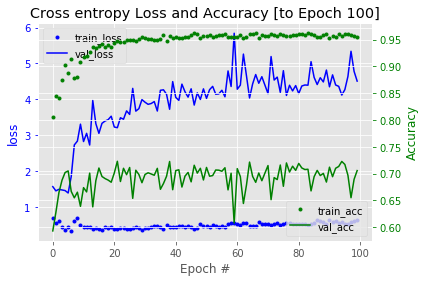

In [96]:
plot_learning_progress(hist, 'AlexNet')

# AlexNet with Image Augmentation on CIFAR10

Data preparation is required when working with neural network and deep learning models. Increasingly data augmentation is also required on more complex object recognition tasks.

Here you will discover how to use  data augmentation with your image datasets when developing and evaluating deep learning models in Python with Keras.

After reading this post, you will know:

* About the image augmentation API provide by Keras and how to use it with your models.
* How to augment data with random rotations, shifts and flips.

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

* Sample-wise standardization.
* Feature-wise standardization.
* ZCA whitening.
* Random rotation, shifts, shear and flips.
* Dimension reordering.
* Save augmented images to disk.

An augmented image generator can be created as follows:


`datagen = ImageDataGenerator()`

Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process, creating augmented image data for you just-in-time. This reduces your memory overhead, but adds some additional time cost during model training.

After you have created and configured your ImageDataGenerator, you must fit it on your data. This will calculate any statistics required to actually perform the transforms to your image data. You can do this by calling the fit() function on the data generator and pass it your training dataset.


`datagen.fit(train)`
The data generator itself is in fact an iterator, returning batches of image samples when requested. We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.


X_batch, y_batch = datagen.flow(train, train, batch_size=32)

You can learn more about the Keras image data generator API in the [Keras documentation](https://keras.io/preprocessing/image/).

## TASK: AlexNet with Image Augmentation
Using the skeleton code below (please use AlexNet that is defined using the functional API) use image augmentation to train an AlexNet network on the CIFAR10 dataset. Please your experimental results using the following format and contrast and DISCUSS with respect to now augmentation:

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|


In [10]:
def create_functional_api_model(img_dim, save_model_img_name):
    DROPOUT = 0.5
    PADDING = "same"

    # (3) Create a sequential model
    # AlexNet Define the Model
    # Feature BODY - Classification HEAD
    model_input = Input(shape = img_dim)
    # FEATURE Body
    # model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    # for original Alexnet 
    # CIFAR10 images are only 32x32x3 and not 224x224x3 so use smaller kernel size here
    # Also use 96 kernels and not 2 x 48 as in the the original e

    # First convolutional Layer (96x3x3)
    z = Conv2D(filters = 96, kernel_size = (3,3), strides = (2,2), activation = "relu", padding=PADDING)(model_input)
    z = MaxPooling2D(pool_size = (2,2), strides=(2,2))(z)
    z = BatchNormalization()(z)

    # Second convolutional Layer (256x5x5)
    z = ZeroPadding2D(padding = (1,1))(z)
    z = Convolution2D(filters = 256, kernel_size = (5,5), strides = (1,1), activation = "relu", padding=PADDING)(z)
    z = MaxPooling2D(pool_size = (3,3), strides=(2,2))(z)
    z = BatchNormalization()(z)


    # Rest 3 convolutional layers
    z = ZeroPadding2D(padding = (1,1))(z)
    z = Convolution2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = "relu", padding=PADDING)(z)

    z = ZeroPadding2D(padding = (1,1))(z)
    z = Convolution2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = "relu", padding=PADDING)(z)

    z = ZeroPadding2D(padding = (1,1))(z)
    z = Convolution2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = "relu", padding=PADDING)(z)


    z = MaxPooling2D(pool_size = (3,3), strides=(2,2))(z)
    z = Flatten()(z)

    z = Dense(4096, activation="tanh")(z)
    z = Dropout(DROPOUT)(z)

    z = Dense(4096, activation="tanh")(z)
    z = Dropout(DROPOUT)(z)

    model_output = Dense(nb_classes, activation="softmax")(z)

    model = Model(model_input, model_output)
    
    display_nn_model(model, save_model_img_name)
    
    return model

In [13]:
from __future__ import print_function
from __future__ import division

import os

import numpy as np
import sklearn.metrics as metrics
from keras import backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Input, Dense, Dropout, Flatten, Activation

from keras.models import Model, load_model

from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img



def run_alexnet_model(img_dim, imgNet="cifar10", data_aug = True, weights_file="weights/ResNext-8-64d.h5"):
    
    # INSERT ALEXNET archittecture code in the style of the Functional API  here
    model = create_functional_api_model(img_dim, 'alexnet_functional_api_' + imgNet + '.png')

    model.compile(loss='categorical_crossentropy', optimizer='adam',\
     metrics=['accuracy'])

    if (imgNet == "cifar10"):
        (trainX, trainY), (testX, testY) = cifar10.load_data()
    elif (imgNet == "cifar100"):
        (trainX, trainY), (testX, testY) = cifar100.load_data()
        
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')

    trainX /= 255.
    testX /= 255.

    Y_train = np_utils.to_categorical(trainY, nb_classes)
    Y_test = np_utils.to_categorical(testY, nb_classes)

    generator = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=5./32,
                                   height_shift_range=5./32,
                                   horizontal_flip=True)

    generator.fit(trainX, seed=0)

    out_dir = "weights/"
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # Load model
    if os.path.exists(weights_file):
        model.load_weights(weights_file)
        print("Model loaded.")

    lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1),
                                   cooldown=0, patience=10, min_lr=1e-6)

    model_checkpoint = ModelCheckpoint(weights_file, monitor="val_acc", save_best_only=True,
                                       save_weights_only=True, mode='auto')

    callbacks = [lr_reducer, model_checkpoint]

    #Fit the model with batches of data sampled from the original data that may augmented or not
    #
    model.fit_generator(generator.flow(trainX, Y_train, batch_size=batch_size),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=nb_epoch,
                        callbacks=callbacks,
                        validation_data=(testX, Y_test),
                        validation_steps=testX.shape[0] // batch_size, verbose=1)

    yPreds = model.predict(testX)
    yPred = np.argmax(yPreds, axis=1)
    yTrue = testY

    accuracy = metrics.accuracy_score(yTrue, yPred) * 100
    error = 100 - accuracy
    print("Accuracy : ", accuracy)
    print("Error : ", error)
    
    

In [14]:
run_alexnet_model(img_dim, 'cifar10', True, "weights/AlexNext-cifar10.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 256)       614656    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
__________

# AlexNet on CIFAR100

## The CIFAR-100 dataset

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

Here is the list of classes in the CIFAR-100:

|Superclass	|Classes|
|---|---|
|aquatic mammals|	beaver, dolphin, otter, seal, whale|
|fish|	aquarium fish, flatfish, ray, shark, trout|
|flowers|	orchids, poppies, roses, sunflowers, tulips|
|food containers|	bottles, bowls, cans, cups, plates|
|fruit and vegetables|	apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|	clock, computer keyboard, lamp, telephone, television|
|household furniture|	bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
|medium-sized mammals|	fox, porcupine, possum, raccoon, skunk|
|non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles 1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles 2	|lawn-mower, rocket, streetcar, tank, tractor|

## Task AlexNet on CIFAR100
Repeat the above AlexNet experiments (no image augmentation versus image augmentation) on the CIFAR100 dataset. Provide similars tables and graphs!

In [15]:
from __future__ import print_function
from __future__ import division

import os

import numpy as np
import sklearn.metrics as metrics
from keras import backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.datasets import cifar100
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

batch_size = 100
nb_classes = 100
#nb_epoch = 100

img_rows, img_cols = 32, 32
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)


run_alexnet_model(img_dim, 'cifar100', True, "weights/AlexNext-cifar100.h5")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 256)         0         
__________

# ResNet and CIFAR10/0 Experiments (20 layers!)
## Introduction to skip connections
A residual neural network is an artificial neural network (ANN) of a kind that builds on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections or short-cuts to jump over some layers. In its limit as ResNets it will only skip over a single layer.With an additional weight matrix to learn the skip weights it is referred to as HighwayNets. With several parallel skips it is referred to as DenseNets. In comparison, a non-residual neural network is described as a plain network in the context of residual neural networks.


A reconstruction of a pyramidal cell. Soma and dendrites are labeled in red, axon arbor in blue. (1) Soma, (2) Basal dendrite, (3) Apical dendrite, (4) Axon, (5) Collateral axon.
The brain has structures similar to residual nets, as cortical layer VI neurons gets input from layer I, skipping over all intermediary layers. In the figure (below, on the right), this compares to signals from the (3) apical dendrite skipping over layers, while the (2) basal dendrite collecting signals from the previous and/or same layer. Similar structures exists for other layers. How many layers in the cerebral cortex compare to layers in an artificial neural network is not clear, neither if every area in cerebral cortex exhibits the same structure, but over large areas they look quite similar.

One motivation for skipping over layers in ANNs is to avoid the problem of vanishing gradients by reusing activations from a previous layer until the layer next to the current one have learned its weights. During training the weights will adapt to mute the previous layer and amplify the layer next to the current. In the simplest case only the weights for the connection to the next to the current layer is adapted, with no explicit weights for the upstream previous layer. This usually works properly when a single non-linear layer is stepped over, or in the case when the intermediate layers are all linear. If not, then an explicit weight matrix should be learned for the skipped connection.

The intuition on why this works is that the neural network collapses into fewer layers in the initial phase, which makes it easier to learn, and thus gradually expands the layers as it learns more of the feature space. During later learning, when all layers are expanded, it will stay closer to the manifold and thus learn faster. A neural network without residual parts will explore more of the feature space. This makes it more vulnerable to small perturbations that cause it to leave the manifold altogether, and require extra training data to get back on track.

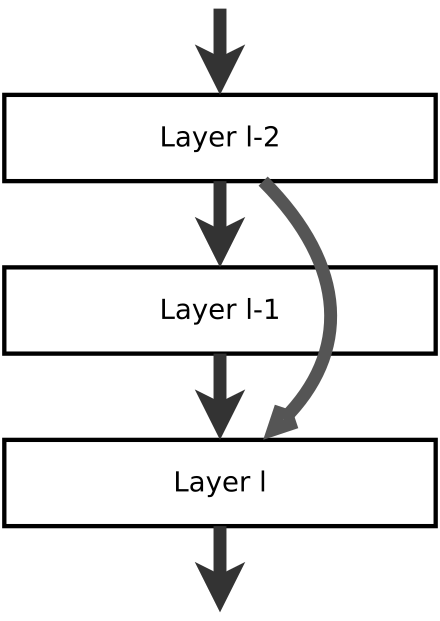
**Canonical form of a residual neural network. A layer ℓ  − 1 is skipped over activation from ℓ − 2.**

For more background on ResNets see [the following WikiPedia page](https://en.wikipedia.org/wiki/Residual_neural_network)

## ResNets: an introduction

Residual Neural Networks (ResNet) were first introduced by Kaiming He et al in 2015.  Resnet network use a novel architecture with “skip connections” and  heavy batch normalization. Such skip connections are also known as gated units or gated recurrent units and have a strong similarity to recent successful elements applied in RNNs. Thanks to this technique they were able to train a NN with 152 layers while still having lower complexity than VGGNet. It achieves a top-5 error rate of 3.57% which beats human-level performance on the ImageNet dataset (1000 categories).

These concepts have allowed us to train networks that
have > 200 layers on ImageNet and > 1;000 layers on CIFAR-10 – depths that were previously
thought impossible to reach while successfully traiing a network.

ResNet networks are composed of a residual building block that is shown below (let's focus on module on the left hand side to begin with). For more details on ResNet see the [original ResNet paper](https://arxiv.org/pdf/1512.03385.pdf) Formally, we consider a building block defined as:
$$y = F(x, \{W_i\}) + x \tag1$$

Here x and y are the input and output vectors of the layers considered. The function $F(x, \{W_i\})$ represents the
residual mapping to be learned. For the example in the figure below  the left hand side image  
 has two layers, $F = W_2σ(W_1x)$ in which σ denotes ReLU and the biases are omitted for simplifying notations. The operation $F + x$ is performed by a shortcut
connection and element-wise addition. We adopt the second
nonlinearity after the addition (i.e., σ(y), see LHS of the Figure below).

The shortcut connections in Eqn.(1) introduce neither extra
parameter nor computation complexity. This is not only
attractive in practice but also important in our comparisons
between plain and residual networks. We can fairly compare
plain/residual networks that simultaneously have the
same number of parameters, depth, width, and computational
cost (except for the negligible element-wise addition).

The dimensions of x and F must be equal in Eqn.(1).
If this is not the case (e.g., when changing the input/output
channels), we can perform a linear projection Ws by the
shortcut connections to match the dimensions:
$$ y = F(x, {W_i}) + W_sx.  \tag 2 $$
We can also use a square matrix $W_s$ in Eqn.(1). But we will
show by experiments that the identity mapping is sufficient
for addressing the degradation problem and is economical,
and thus Ws is only used when matching dimensions.

The form of the residual function F is flexible. Experiments in
the original ResNet paper involve a function F that has two or
three layers (RHS architecture below), while more layers are possible. But if
F has only a single layer, Eqn.(1) is similar to a linear layer:
$y = W_1x + x$, for which we have not observed advantages.


We also note that although the above notations are about
fully-connected layers for simplicity, they are applicable to
convolutional layers. The function F(x, {Wi}) can represent
multiple convolutional layers. The element-wise addition
is performed on two feature maps, channel by channel.


###  ResNet  Basic Flavors

The residual module consists of many flavors. Here we explore two:

* Original ResNet module
* Bottleneck Resnet module

The first is simply a shortcut which connects the input to an addition of the second branch, a series
of convolutions and activations (Figure below, left).
However, in the same paper, it was found that bottleneck residual modules perform better,
especially when training deeper networks. The bottleneck is a simple extension to the residual
module. We still have our shortcut module, only now the second branch to our micro-architecture
has changed. Instead of applying only two convolutions, we are now applying three convolutions
(Figure below, middle).
The first CONV consists of 1x1 filters, the second of 3x3 filters, and the third of 1x1 filters.
Furthermore, the number of filters learned by the first two CONV is 1=4 the number learned by the
final CONV – this point is where the “bottleneck” comes in.
Finally, in an updated 2016 publication [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027.pdf), He
et al. experimented with the ordering of convolution, activation, and batch normalization layers
within the residual module. They found that by applying pre-activation (i.e., placing the RELU and
BN before the CONV) higher accuracy could be obtained (Figure below, right).

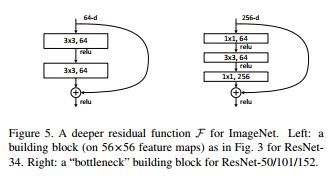

###  ResNet  V0, V1 and V2  (pre-activation Resnet Module)

So far we have introduced residual module consists of many flavors: 

* Original ResNet module (referred to as V0 later)
* Bottleneck Resnet module (referred to as V2Post later)

Here we introduce another flavor:
* pre-activation Bottleneck Resnet module (referred to as V2 later)

In an updated 2016 publication [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027.pdf), He
et al. experimented with the ordering of convolution, activation, and batch normalization layers
within the residual module. They found that by applying pre-activation (i.e., placing the RELU and
BN before the CONV) higher accuracy could be obtained (Figure below, right).

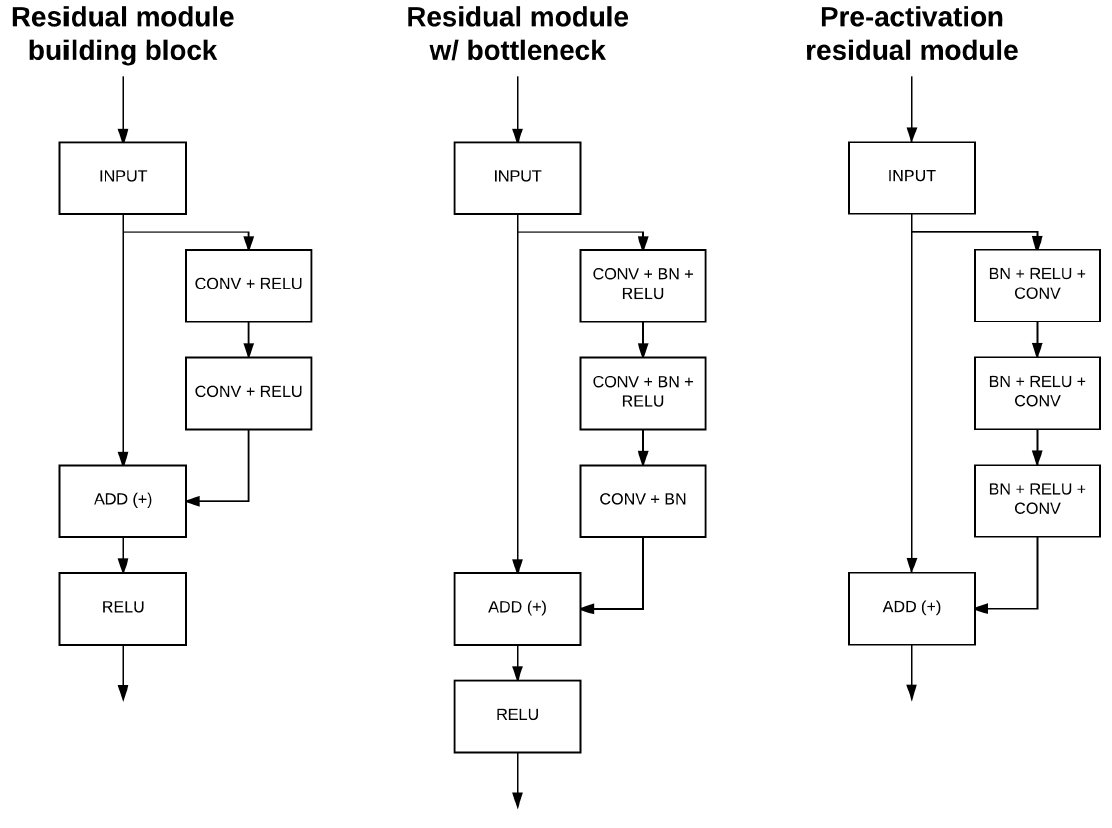
**Left: The original residual module building block (referred to as V0 above). Center: The residual module
with a bottleneck. The bottleneck adds in an extra CONV layer. This module also helps reduce the
dimensionality of spatial volumes(referred to as V1 above). Right: The updated pre-activation module that changes the
order of RELU, CONV, and BN (V2).**

Going forward we will refer to these different flavors of residual units as follows:

* **V0: original 2-layer residual block (2 layer unit)**
  * $2D_{3x3}-ReLU-2D_{3x3}-ADD-ReLU$
  * `layers.Conv2D(64, (3,3), padding='same', strides=(1, 1), kernel_initializer='glorot_uniform', name=conv_name_base + '2a')(input_tensor)`
  * Note ADD is an element-wise addition is performed on two feature maps, channel by channel.
* **V1: uses a basic building block (2-layer unit with BN-RELU)** has two flavors (for details see the following paper: [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027.pdf)):
  * Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    <pre>Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64</pre>
  * identity as the shortcut: $2D_{3x3}-BN-ReLU--2D_{3x3}-BN---ADD-ReLU$
  * convolution as the short cut (required to upsize the number of features for the skip connection or shortcut): 
  * Note ADD is an **element-wise addition** is performed on two feature maps, channel by channel.
  * The following depicts a Resnet V1 Unit. Here view the first node as the input node. Notice the short cut is a convolution here since this is the first ResNet unit in a stage.
  
  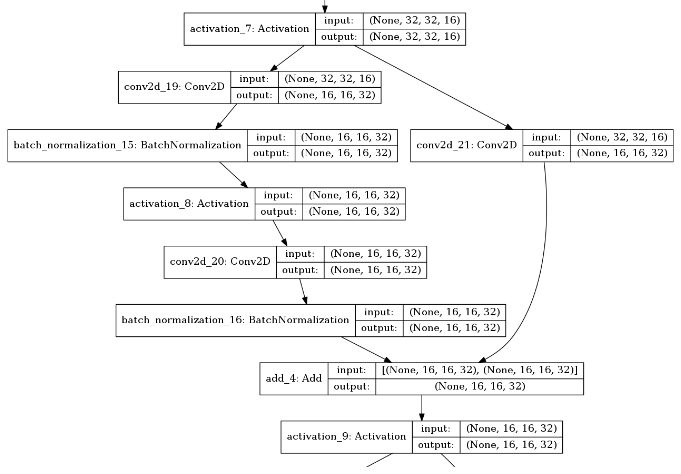
  

* ** V2Post**: uses “bottleneck” building block (3-layer unit with BN-ReLU post the bottleneck layers) has two flavors:
  * identity as the shortcut: $2D_{1x1}-BN-ReLU--2D_{3x3}-BN-ReLU--2D_{1x1}-BN--ADD-ReLU$
  * convolution as the short cut (required to upsize the number of features for the skip connection or shortcut): 
  * Note ADD is an **element-wise addition** is performed on two feature maps, channel by channel. 
* ** V2 ** (discussed in a later section): uses “bottleneck” building block (3-layer unit) has two flavors:
  *  Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as bottleneck layer
    <pre> First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256 </pre>
  * identity as the shortcut: $-BN-ReLU-2D_{1x1}-BN-ReLU--2D_{3x3}-BN-ReLU--2D_{1x1}-BN--ADD-ReLU$
  * convolution as the short cut (required to upsize the number of features for the skip connection or shortcut): 
  * Note ADD is an **element-wise addition** is performed on two feature maps, channel by channel.
  * The following depicts a Resnet V2 Unit. Here view the first node as the input node. Notice the short cut is a convolution here since this is the first ResNet unit in a stage.
  
  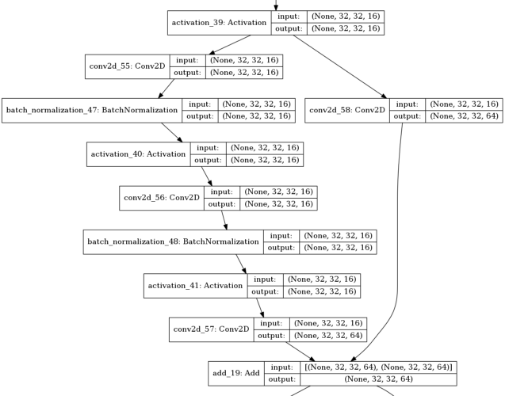

### ResNet50 with the Bottleneck Building Block
Let's have a closer look at resnet_50.  resnet_50 uses a “bottleneck” building block (V2) as depicted on the right in the figure below. In the [original ResNet paper](https://arxiv.org/pdf/1512.03385.pdf), the following implementations and experiments on the ImageNet2015 dataset, also used the “bottleneck” building block depicted below on the RHS:
* ResNet-50/101/152

A ResNet50 network is composed of  a stages list of (3, 4, 6, 3) and a corresponding filters list
of (64, 256, 512, 1024, 2048). The first CONV layer in ResNet (before any residual module)
will learn K = 64 filters. Then, the first set of three residual modules will learn K = 256 filters. The
number of filters learned will increase to K = 512 for the four residual modules stacked together. In
the third stage, six residual modules will be stacked, each responsible for learning K = 1024 filters.
And finally, the fourth stage will stack three residual modules that will learn K = 2048 filters.


Again, we call this architecture “ResNet50” since there are 1+(3x3)+(4x3)+(6x3)+
(3x3)+1 = 50 trainable layers in the network.

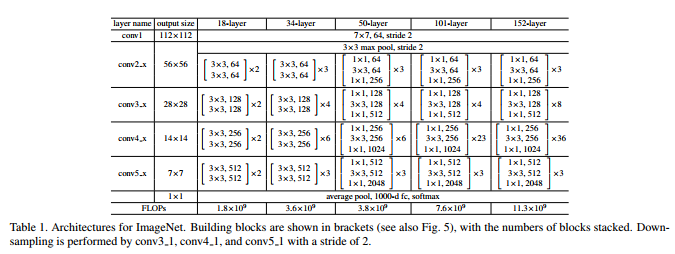

### Notes on ResNet Architecture
1.  The first layers are a Conv2D (stride 2) and max pooling (2x2) layers that quarter the size of the input tensor:

<pre>
    x = layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

</pre>

2. The input size and the output size for the first Resnet block are equal, whereas the  the output size for the remaining  Resnet blocks are halved by the stride=(2,2)

##  The ResNet20 V1 architecture
In this section we graphically depict ResNet20 architecture that uses the  **V1** residual unit. Recall that  **V1** residual unit uses a basic building block (2-layer unit with BN-RELU) that has two flavors (for details see the following paper: [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027.pdf)):
  * ResNet20 has 3 stages, where each stage has 3 ResNet V1 modules
  * This leads to 6layers where we need to learn weights per stage (3 stages by 2 3x3 layers)
  * A ResNet V1 Modules is made up of a stack 2 x (3 x 3) Conv2D-BN-ReLU
    <pre>Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64</pre>
  * identity as the shortcut: $2D_{3x3}-BN-ReLU--2D_{3x3}-BN---ADD-ReLU$
  * convolution as the short cut (required to upsize the number of features for the skip connection or shortcut): 
  * Note ADD is an **element-wise addition** is performed on two feature maps, channel by channel.
  
  
Notice the stages in the architecture are punctuated by the **convolutional skip connection layer **.

<img src="ResNet20v1.png" alt="Drawing" style="width: =700px;"/>


### ResNet50 implementation in Keras (** V2Post**)
Keras has an implementation of ResNet50 located [here](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py). This implementation is based on the ** V2Post** version of the the ResNet module. Please have a close look at this implementation. I include code snippets below for exposition purposes.

Notice the following for ResNet50 network:
* it is composed of a stages list of (1, 3, 4, 6, 3) and a corresponding filters list of (64, 256, 512, 1024, 2048).   
  * The first CONV layer in ResNet (before any residual module) will learn K = 64 filters. 
  * Then, for the second stage, (our first stage that is made up of ResNet Block units): the first set of three residual modules will learn K = 256 filters.
  * Then, for stage 3 consists of 4 ResNet units with 256 kernels
  * Etc.
* Resnet50 has 4 resnet stages (Conv2-5)
  * Each Stage has $m$ ResNet Units that output Feature maps volumes of the same size depth
* Each stage begins with a ResNet Bottleneck unit where the shortcut is a Convolution that increases the number of output feature maps (from in this case 64 to 256).

E.g., the first ResNet stage (Conv2_X)  consists of 3 ResNet building bottleneck blocks (V1); the code for ths stage looks like the following:

<pre>
     x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
     x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
     x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')</pre>

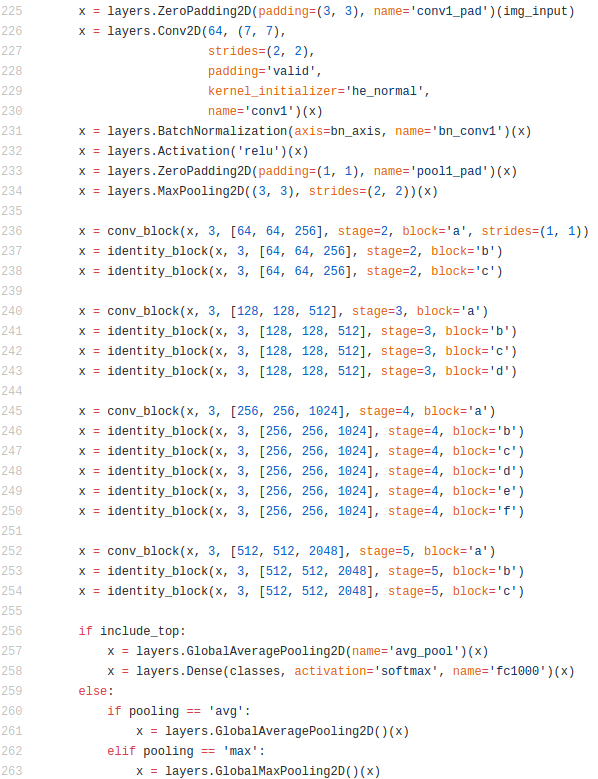


Where the above ResNet50 implementation (similar to the He et al. 2015 implementation) uses a “bottleneck” building block  is implemented as follows:


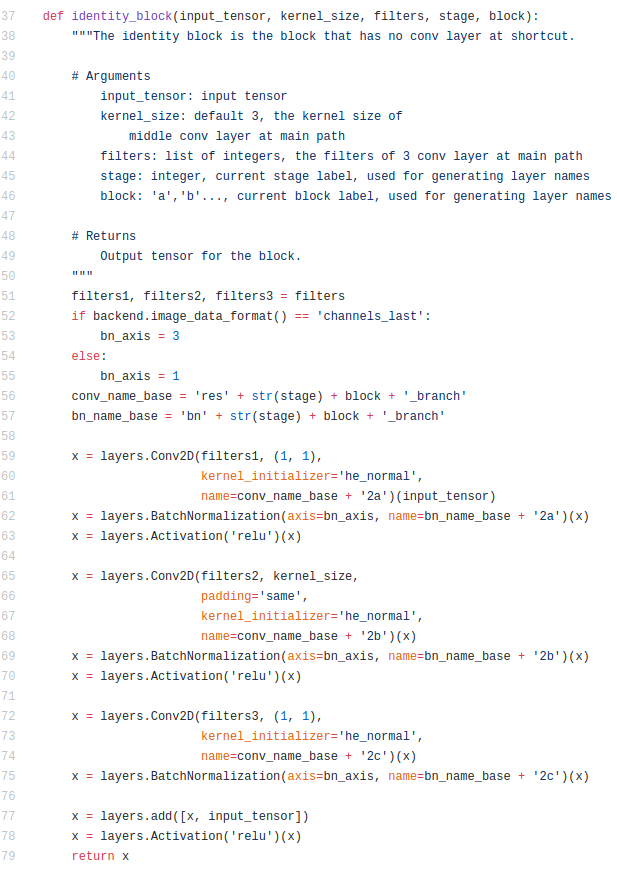

The following is an implementation of ResNet Bottleneck unit where the shortcut is a Convolution that increases the number of output feature maps (e.g., case 64 feature maps to 256 feature maps).
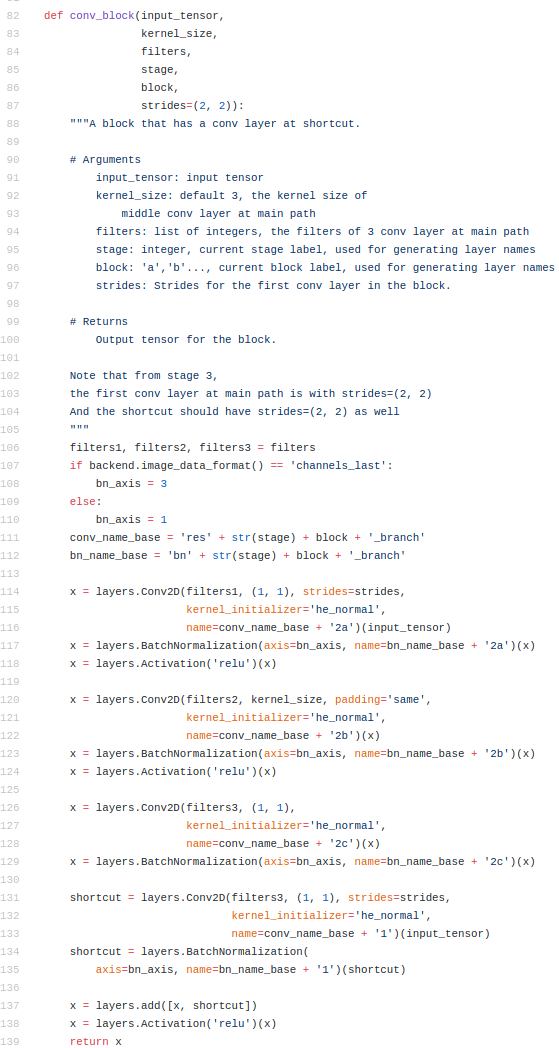

##  Tackling CIFAR10 with ResNet V1 (“bottleneck” building block)

The following is an implementation of ResNet for the CIFAR10 dataset that uses the **V1 Residual Block**.

* **V1: uses a basic building block (2-layer unit with BN-RELU)** has two flavors (for details see the following paper: [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027.pdf)):
  * ResNet20 has 3 stages, where each stage has 3 ResNet V1 modules
  * This leads to 6layers where we need to learn weights per stage (3 stages by 2 3x3 layers)
  * A ResNet V1 Modules is made up of a stack 2 x (3 x 3) Conv2D-BN-ReLU

    <pre>Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64</pre>
  * identity as the shortcut: $2D_{3x3}-BN-ReLU--2D_{3x3}-BN---ADD-ReLU$
  * convolution as the short cut (required to upsize the number of features for the skip connection or shortcut): 
  * Note ADD is an **element-wise addition** is performed on two feature maps, channel by channel.

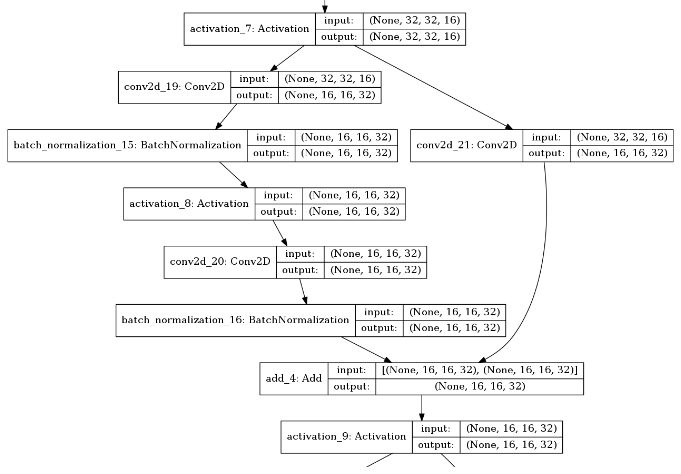

ResNet operates with multiple stages, where each stage has the same output tensor dimensions. Each stage consists of 2 ResNet Blocks. To obtain a ResNet20 archicture with V1 units then the number of stages will be 3, yielding 20 layers (3 * 6 + 2) (where each stage has 2 V1 ResNet units)



In [31]:
%%time
"""Trains a ResNet on the CIFAR10 dataset.

ResNet v1
[a] Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf

"""

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os


def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


def run_resnet_model(model, imgNet, data_augmentation, input_shape, x_train, y_train, x_test, y_test):
   

    # get the data
    
     # Training parameters
    batch_size = 32  # orig paper trained all networks with batch_size=128
    data_augmentation = data_augmentation
    
    if (imgNet == "cifar10"):
        num_classes = 10
    elif (imgNet == "cifar100"):
        num_classes = 100

    # Subtracting pixel mean improves accuracy
    subtract_pixel_mean = True

    n = 3

    # Model version
    # Orig paper: version = 1 (ResNet v1)
    version = 1

    # Model name, depth and version
    model_type = 'ResNet%dv%dAug_%s' % (depth, version,data_augmentation)   

    # Normalize data.
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # If subtract pixel mean is enabled
    if subtract_pixel_mean:
        x_train_mean = np.mean(x_train, axis=0)
        x_train -= x_train_mean
        x_test -= x_train_mean

    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    print('y_train shape:', y_train.shape)

    # Convert class vectors to binary class matrices.
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)


    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr_schedule(0)),
                  metrics=['accuracy'])
    print(model_type)

    #model.summary()
    #plot_model(model, to_file=model_type+'.png', show_shapes=True, show_layer_names=True)
    display_nn_model(model, model_type+'.png')

    # Prepare model model saving directory.
    save_dir = os.path.join(os.getcwd(), 'saved_models')
    model_name = imgNet + '_%s_model.{epoch:03d}.h5' % model_type
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, model_name)

    # Prepare callbacks for model saving and for learning rate adjustment.
    checkpoint = ModelCheckpoint(filepath=filepath,
                                 monitor='val_acc',
                                 verbose=1,
                                 save_best_only=True)

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                   cooldown=0,
                                   patience=5,
                                   min_lr=0.5e-6)

    callbacks = [checkpoint, lr_reducer, lr_scheduler]


    # Run training, with or without data augmentation.
    hist=[]
    if not data_augmentation:
        print('Not using data augmentation.')
        hist = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=nb_epoch,
                  validation_data=(x_test, y_test),
                  shuffle=True,
                  callbacks=callbacks)
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            # set input mean to 0 over the dataset
            featurewise_center=False,
            # set each sample mean to 0
            samplewise_center=False,
            # divide inputs by std of dataset
            featurewise_std_normalization=False,
            # divide each input by its std
            samplewise_std_normalization=False,
            # apply ZCA whitening
            zca_whitening=False,
            # epsilon for ZCA whitening
            zca_epsilon=1e-06,
            # randomly rotate images in the range (deg 0 to 180)
            rotation_range=0,
            # randomly shift images horizontally
            width_shift_range=0.1,
            # randomly shift images vertically
            height_shift_range=0.1,
            # set range for random shear
            shear_range=0.,
            # set range for random zoom
            zoom_range=0.,
            # set range for random channel shifts
            channel_shift_range=0.,
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            # value used for fill_mode = "constant"
            cval=0.,
            # randomly flip images
            horizontal_flip=True,
            # randomly flip images
            vertical_flip=False,
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        
        
    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=nb_epoch, verbose=1, workers=4,
                        callbacks=callbacks)

    # Score trained model.
    scores = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
        
    plot_learning_progress(hist, 'ResNetV1')
        

CPU times: user 45 µs, sys: 7 µs, total: 52 µs
Wall time: 56 µs


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
ResNet20v1Aug_True
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_58 (BatchNo (None, 32, 32, 16)   64          conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_58 (Activation)      (None, 32, 32, 16)   0           bat

Using real-time data augmentation.
Epoch 1/10
Learning rate:  0.001
1563/1563 [==============================] - 477s 305ms/step - loss: 1.5624 - acc: 0.4911 - val_loss: 1.3204 - val_acc: 0.5791

Epoch 00001: val_acc improved from -inf to 0.57910, saving model to /root/shared/assignment/saved_models/cifar10_ResNet20v1Aug_True_model.001.h5
Epoch 2/10
Learning rate:  0.001
1563/1563 [==============================] - 471s 301ms/step - loss: 1.1697 - acc: 0.6410 - val_loss: 1.1929 - val_acc: 0.6351

Epoch 00002: val_acc improved from 0.57910 to 0.63510, saving model to /root/shared/assignment/saved_models/cifar10_ResNet20v1Aug_True_model.002.h5
Epoch 3/10
Learning rate:  0.001
1563/1563 [==============================] - 471s 301ms/step - loss: 1.0176 - acc: 0.7000 - val_loss: 1.1151 - val_acc: 0.6763

Epoch 00003: val_acc improved from 0.63510 to 0.67630, saving model to /root/shared/assignment/saved_models/cifar10_ResNet20v1Aug_True_model.003.h5
Epoch 4/10
Learning rate:  0.001
1563/156

<Figure size 432x288 with 0 Axes>

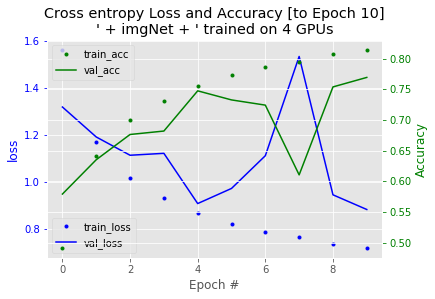

In [25]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

input_shape = x_train.shape[1:]
n = 3
depth = n * 6 + 2
    
model = resnet_v1(input_shape=input_shape, depth=depth)

run_resnet_model(model, 'cifar10', True, input_shape, x_train, y_train, x_test, y_test)

### TASK: Tackling CIFAR10 with ResNet  (OPTIONAL TASK)
Using the above implementation train a ResNet20 V1 network  on the CIFAR10 dataset (with and without image augmentation). Please present a summary of your models, and visualize the model architectures. Plot the CX loss and accuracy at 1 curves obtaining during training.  Please discuss your experimental results using the following format and contrast and DISCUSS with respect to augmentation:

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|
| ResNeXt|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
ResNet20v1Aug_True
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_58 (BatchNo (None, 32, 32, 16)   64          conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_58 (Activation)      (None, 32, 32, 16)   0           bat

Using real-time data augmentation.
Epoch 1/10
Learning rate:  0.001
1563/1563 [==============================] - 477s 305ms/step - loss: 0.6977 - acc: 0.8208 - val_loss: 1.0554 - val_acc: 0.7247

Epoch 00001: val_acc improved from -inf to 0.72470, saving model to /root/shared/assignment/saved_models/cifar10_ResNet20v1Aug_True_model.001.h5
Epoch 2/10
Learning rate:  0.001
1563/1563 [==============================] - 473s 302ms/step - loss: 0.6853 - acc: 0.8260 - val_loss: 0.7983 - val_acc: 0.7982

Epoch 00002: val_acc improved from 0.72470 to 0.79820, saving model to /root/shared/assignment/saved_models/cifar10_ResNet20v1Aug_True_model.002.h5
Epoch 3/10
Learning rate:  0.001
1563/1563 [==============================] - 473s 303ms/step - loss: 0.6720 - acc: 0.8317 - val_loss: 1.1028 - val_acc: 0.7186

Epoch 00003: val_acc did not improve from 0.79820
Epoch 4/10
Learning rate:  0.001
1563/1563 [==============================] - 474s 303ms/step - loss: 0.6662 - acc: 0.8352 - val_loss: 0.76

<Figure size 432x288 with 0 Axes>

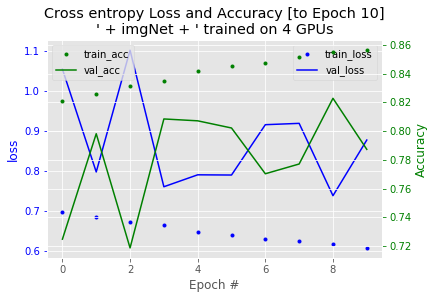

In [26]:
run_resnet_model(model, 'cifar10', False, input_shape, x_train, y_train, x_test, y_test)

## Visualize the architecture (RERUN to see the latest version)
(RERUN to see the latest version)
<img src="ResNet20v1.png" alt="Drawing" style="width: =700px;"/>


### TASK: Tackling CIFAR100 with ResNet  (OPTIONAL TASK)
Using the above implementation train a ResNet20 V1 network  on the **CIFAR100** (100 classes) dataset (with and without image augmentation). Please present a summary of your models, and visualize the model architectures. Plot the CX loss and accuracy at 1 curves obtaining during training.  Please discuss your experimental results using the following format and contrast and DISCUSS with respect to augmentation:

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|
| ResNeXt|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
ResNet20v1Aug_True
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_127 (Conv2D)             (None, 32, 32, 16)   448         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_115 (BatchN (None, 32, 32, 16)   64          conv2d_127[0][0]                 
__________________________________________________________________________________________________
activation_115 (Activation)     (None, 32, 32, 16)   0           bat

Using real-time data augmentation.
Epoch 1/10
Learning rate:  0.001
1563/1563 [==============================] - 484s 310ms/step - loss: 4.1276 - acc: 0.0945 - val_loss: 3.7223 - val_acc: 0.1516

Epoch 00001: val_acc improved from -inf to 0.15160, saving model to /root/shared/assignment/saved_models/cifar100_ResNet20v1Aug_True_model.001.h5
Epoch 2/10
Learning rate:  0.001
1563/1563 [==============================] - 476s 304ms/step - loss: 3.4268 - acc: 0.1983 - val_loss: 3.1726 - val_acc: 0.2432

Epoch 00002: val_acc improved from 0.15160 to 0.24320, saving model to /root/shared/assignment/saved_models/cifar100_ResNet20v1Aug_True_model.002.h5
Epoch 3/10
Learning rate:  0.001
1563/1563 [==============================] - 475s 304ms/step - loss: 3.0365 - acc: 0.2712 - val_loss: 2.9673 - val_acc: 0.2852

Epoch 00003: val_acc improved from 0.24320 to 0.28520, saving model to /root/shared/assignment/saved_models/cifar100_ResNet20v1Aug_True_model.003.h5
Epoch 4/10
Learning rate:  0.001
1563/

<Figure size 432x288 with 0 Axes>

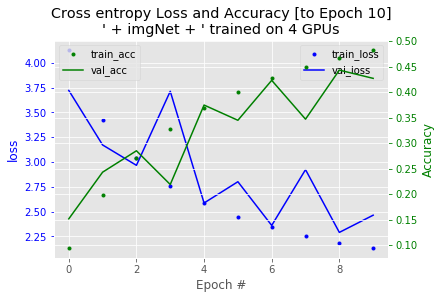

In [32]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

input_shape = x_train.shape[1:]
    
model = resnet_v1(input_shape=input_shape, depth=depth, num_classes = 100)

run_resnet_model(model, 'cifar100', True, input_shape, x_train, y_train, x_test, y_test)

In [33]:
run_resnet_model(model, 'cifar100', False, input_shape, x_train, y_train, x_test, y_test)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
ResNet20v1Aug_False
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_127 (Conv2D)             (None, 32, 32, 16)   448         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_115 (BatchN (None, 32, 32, 16)   64          conv2d_127[0][0]                 
__________________________________________________________________________________________________
activation_115 (Activation)     (None, 32, 32, 16)   0           ba

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
Learning rate:  0.001
50000/50000 [==============================] - 482s 10ms/step - loss: 1.9846 - acc: 0.5183 - val_loss: 2.2048 - val_acc: 0.4705

Epoch 00001: val_acc improved from -inf to 0.47050, saving model to /root/shared/assignment/saved_models/cifar100_ResNet20v1Aug_False_model.001.h5
Epoch 2/10
Learning rate:  0.001
50000/50000 [==============================] - 476s 10ms/step - loss: 1.8619 - acc: 0.5487 - val_loss: 2.4269 - val_acc: 0.4373

Epoch 00002: val_acc did not improve from 0.47050
Epoch 3/10
Learning rate:  0.001
50000/50000 [==============================] - 475s 10ms/step - loss: 1.7638 - acc: 0.5743 - val_loss: 2.2721 - val_acc: 0.4663

Epoch 00003: val_acc did not improve from 0.47050
Epoch 4/10
Learning rate:  0.001
50000/50000 [==============================] - 475s 10ms/step - loss: 1.6913 - acc: 0.5929 - val_loss: 2.0997 - val_acc: 0.5105

Epoch 00004: val_acc impro

#  ResNet  V2 in Keras: 29 layers !(pre-activation Resnet Module)

The cornerstone of ResNet is the residual module, first introduced by He et al. in their 2015 paper,
Deep Residual Learning for Image Recognition. The residual module consists of two branches.
The first is simply a shortcut which connects the input to an addition of the second branch, a series
of convolutions and activations (Figure below, left).
However, in the same paper, it was found that bottleneck residual modules perform better,
especially when training deeper networks. The bottleneck is a simple extension to the residual
module. We still have our shortcut module, only now the second branch to our micro-architecture
has changed. Instead of applying only two convolutions, we are now applying three convolutions
(Figure below, middle).
The first CONV consists of 1x1 filters, the second of 3x3 filters, and the third of 1x1 filters.
Furthermore, the number of filters learned by the first two CONV is 1=4 the number learned by the
final CONV – this point is where the “bottleneck” comes in.
Finally, in an updated 2016 publication [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027.pdf), He
et al. experimented with the ordering of convolution, activation, and batch normalization layers
within the residual module. They found that by applying pre-activation (i.e., placing the RELU and
BN before the CONV) higher accuracy could be obtained (Figure below, right).

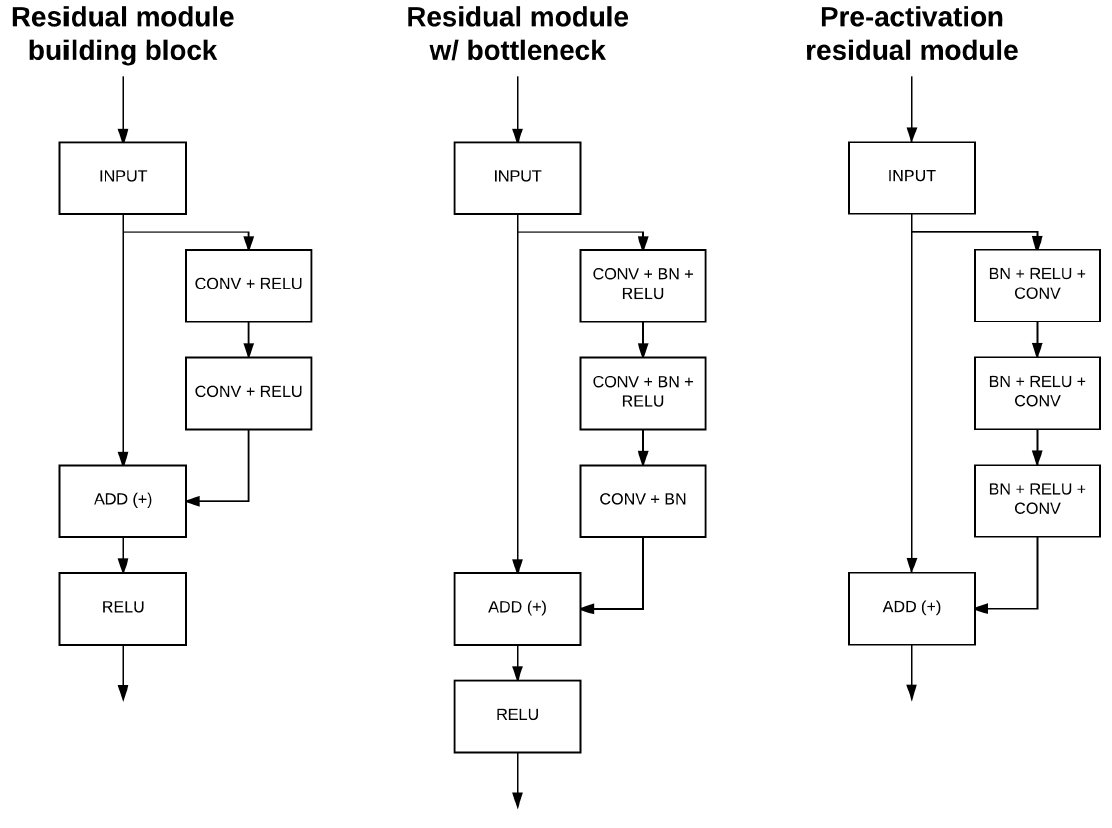
**Left: The original residual module building block (referred to as V0 above). Center: The residual module
with a bottleneck. The bottleneck adds in an extra CONV layer. This module also helps reduce the
dimensionality of spatial volumes(referred to as V1 above). Right: The updated pre-activation module that changes the
order of RELU, CONV, and BN (V2).**

ResNet29 has 3 stages, where each stage has 3 ResNet V1 modules:
  * This leads to 9 layers (bottleneck module) where we need to learn weights per stage (3 stages by 3 convolution layers)
  * A ResNet V1 Modules is made up of a stack 3 convolution layers  BN-ReLU-Conv2D
* ** V2 ** (discussed in a later section): uses “bottleneck” building block (3-layer unit) has two flavors:
  *  Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as bottleneck layer
    <pre> First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256 </pre>
  * identity as the shortcut: $-BN-ReLU-2D_{1x1}-BN-ReLU--2D_{3x3}-BN-ReLU--2D_{1x1}-BN--ADD-ReLU$
  * convolution as the short cut (required to upsize the number of features for the skip connection or shortcut): 
  * Note ADD is an **element-wise addition** is performed on two feature maps, channel by channel.
  * The following depicts a Resnet V2 Unit. Here view the first node as the input node. Notice the short cut is a convolution here since this is the first ResNet unit in a stage.
  
 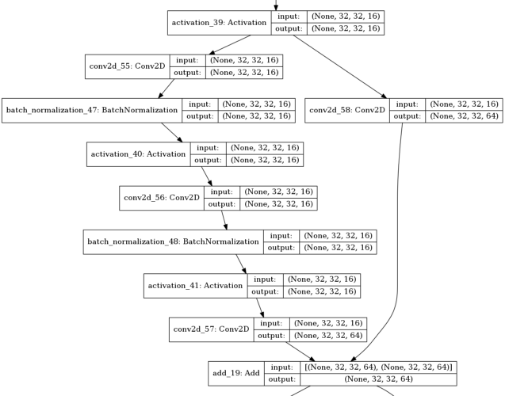


In [35]:
"""Trains a ResNet on the CIFAR10 dataset.

ResNet v1
[a] Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf

ResNet v2
[b] Identity Mappings in Deep Residual Networks
https://arxiv.org/pdf/1603.05027.pdf
"""

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Training parameters
batch_size = 32  # orig paper trained all networks with batch_size=128

data_augmentation = True
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------


def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x



def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

### TASK: Tackling CIFAR10 with ResNet29 V2  (OPTIONAL TASK)
Using the above implementation train a ResNet20 V2 network  on the CIFAR10 dataset (with and without image augmentation). Please present a summary of your models, and visualize the model architectures. Plot the CX loss and accuracy at 1 curves obtaining during training.  Please discuss your experimental results using the following format and contrast and DISCUSS with respect to augmentation:

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|
| ResNet29 V2|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
ResNet29v1Aug_True
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_148 (Conv2D)             (None, 32, 32, 16)   448         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_134 (BatchN (None, 32, 32, 16)   64          conv2d_148[0][0]                 
__________________________________________________________________________________________________
activation_134 (Activation)     (None, 32, 32, 16)   0           bat

Using real-time data augmentation.
Epoch 1/10
Learning rate:  0.001
1563/1563 [==============================] - 1162s 743ms/step - loss: 1.8666 - acc: 0.4847 - val_loss: 1.7224 - val_acc: 0.5024

Epoch 00001: val_acc improved from -inf to 0.50240, saving model to /root/shared/assignment/saved_models/cifar10_ResNet29v1Aug_True_model.001.h5
Epoch 2/10
Learning rate:  0.001
1563/1563 [==============================] - 1151s 737ms/step - loss: 1.3880 - acc: 0.6193 - val_loss: 1.5593 - val_acc: 0.5966

Epoch 00002: val_acc improved from 0.50240 to 0.59660, saving model to /root/shared/assignment/saved_models/cifar10_ResNet29v1Aug_True_model.002.h5
Epoch 3/10
Learning rate:  0.001
1563/1563 [==============================] - 1154s 738ms/step - loss: 1.1907 - acc: 0.6839 - val_loss: 1.2213 - val_acc: 0.6661

Epoch 00003: val_acc improved from 0.59660 to 0.66610, saving model to /root/shared/assignment/saved_models/cifar10_ResNet29v1Aug_True_model.003.h5
Epoch 4/10
Learning rate:  0.001
1563/

<Figure size 432x288 with 0 Axes>

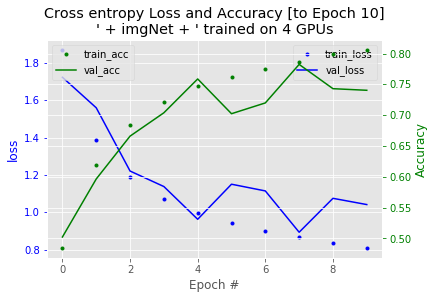

In [36]:
# test cifar10 with img augmentation

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

input_shape = x_train.shape[1:]
n = 3
depth = n * 9 + 2

    
model = resnet_v2(input_shape=input_shape, depth=depth)

run_resnet_model(model, 'cifar10', True, input_shape, x_train, y_train, x_test, y_test)

In [37]:
# test cifar10 without img augmentation

run_resnet_model(model, 'cifar10', False, input_shape, x_train, y_train, x_test, y_test)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
ResNet29v1Aug_False
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_148 (Conv2D)             (None, 32, 32, 16)   448         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_134 (BatchN (None, 32, 32, 16)   64          conv2d_148[0][0]                 
__________________________________________________________________________________________________
activation_134 (Activation)     (None, 32, 32, 16)   0           ba

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
Learning rate:  0.001
50000/50000 [==============================] - 1158s 23ms/step - loss: 0.7398 - acc: 0.8267 - val_loss: 1.0261 - val_acc: 0.7466

Epoch 00001: val_acc improved from -inf to 0.74660, saving model to /root/shared/assignment/saved_models/cifar10_ResNet29v1Aug_False_model.001.h5
Epoch 2/10
Learning rate:  0.001
50000/50000 [==============================] - 1149s 23ms/step - loss: 0.6783 - acc: 0.8488 - val_loss: 0.7885 - val_acc: 0.8153

Epoch 00002: val_acc improved from 0.74660 to 0.81530, saving model to /root/shared/assignment/saved_models/cifar10_ResNet29v1Aug_False_model.002.h5
Epoch 3/10
Learning rate:  0.001
50000/50000 [==============================] - 1149s 23ms/step - loss: 0.6446 - acc: 0.8615 - val_loss: 0.8899 - val_acc: 0.7842

Epoch 00003: val_acc did not improve from 0.81530
Epoch 4/10
Learning rate:  0.001
50000/50000 [==============================] - 1151s 2

# TASK: implement Basic ResNet Module (OPTIONAL)

Using the following ResNetV1 or ResNetV2 as inspiration and as a starting point:
* Implement the basic ResNet building block V0 (on the left hand side in the figure below) 
* Train ResNet-20 using this V0 ResNet module on the CIFAR10 small images dataset
* Report your experimental results as you have done previously

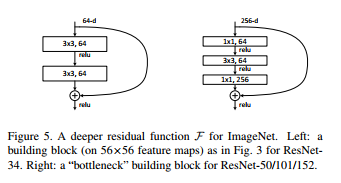

# From Resnet to ResNeXt on CIFAR10

ResNeXt extends the ResNet block with a new expanded block architecture, which depends on a cardinality parameter (32 in this case) which denotes the number of lightweight bottleneck units in the residual unit (previously we in ResNet V2 we had only one bottleneck unit (1x1, 3x3, 1x1). It can be further visualised in the below diagram from the paper.


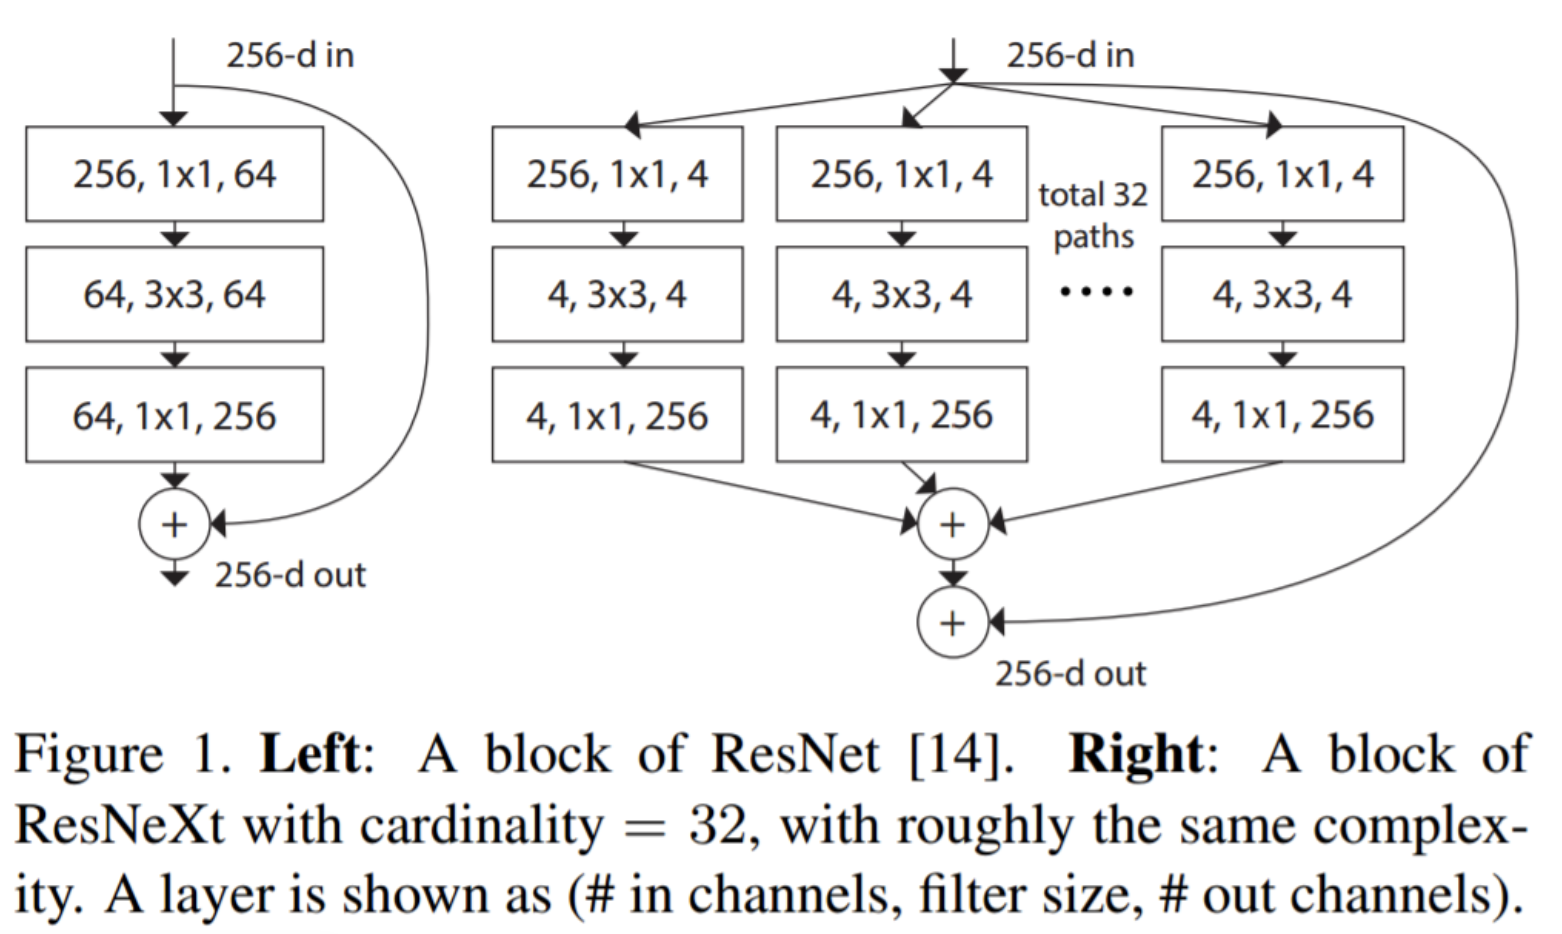
An Implementation of ResNeXt models from the paper Aggregated Residual Transformations for Deep Neural Networks in Keras 2.0+ is available [here](https://github.com/titu1994/Keras-ResNeXt)

This repo contains code for building the general ResNeXt model (optimized for datasets similar to CIFAR) and ResNeXtImageNet (optimized for the ImageNet dataset).

## Visualize the ResNeXt architecture 
It is difficult to visualize the ResNeXt architecture. But here we go. Go outside the notebook and visualize the .png file using an image viewer, and zoom in!

<img src="model_plotResNeXt-Cifar10-v1.png" alt="Drawing" style="width: =1200px;"/>


## TASK: Tackling CIFAR10 with ResNeXt  (OPTIONAL TASK)

Using the [ResNeXt implementation here](https://github.com/titu1994/Keras-ResNeXt)  train a network on the CIFAR10 dataset (with and without image augmentation). Please report your experimental results using the following format and contrast and DISCUSS with respect to now augmentation, along with various training progress plots and architecture diagrams:

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|
| ResNeXt|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|

Starter code for ResNeXt and CIFAR10 experiments is included below.

In [149]:
#%%writefile __init__.py


UsageError: %%writefile is a cell magic, but the cell body is empty.


In [152]:
!cat __init__.py

In [154]:
%%writefile resnext.py
'''ResNeXt models for Keras.
# Reference
- [Aggregated Residual Transformations for Deep Neural Networks](https://arxiv.org/pdf/1611.05431.pdf))
'''
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

import warnings

from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K

CIFAR_TH_WEIGHTS_PATH = ''
CIFAR_TF_WEIGHTS_PATH = ''
CIFAR_TH_WEIGHTS_PATH_NO_TOP = ''
CIFAR_TF_WEIGHTS_PATH_NO_TOP = ''

IMAGENET_TH_WEIGHTS_PATH = ''
IMAGENET_TF_WEIGHTS_PATH = ''
IMAGENET_TH_WEIGHTS_PATH_NO_TOP = ''
IMAGENET_TF_WEIGHTS_PATH_NO_TOP = ''


def ResNext(input_shape=None, depth=29, cardinality=8, width=64, weight_decay=5e-4,
            include_top=True, weights=None, input_tensor=None,
            pooling=None, classes=10):
    """Instantiate the ResNeXt architecture. Note that ,
        when using TensorFlow for best performance you should set
        `image_data_format="channels_last"` in your Keras config
        at ~/.keras/keras.json.
        The model are compatible with both
        TensorFlow and Theano. The dimension ordering
        convention used by the model is the one
        specified in your Keras config file.
        # Arguments
            depth: number or layers in the ResNeXt model. Can be an
                integer or a list of integers.
            cardinality: the size of the set of transformations
            width: multiplier to the ResNeXt width (number of filters)
            weight_decay: weight decay (l2 norm)
            include_top: whether to include the fully-connected
                layer at the top of the network.
            weights: `None` (random initialization)
            input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
                to use as image input for the model.
            input_shape: optional shape tuple, only to be specified
                if `include_top` is False (otherwise the input shape
                has to be `(32, 32, 3)` (with `tf` dim ordering)
                or `(3, 32, 32)` (with `th` dim ordering).
                It should have exactly 3 inputs channels,
                and width and height should be no smaller than 8.
                E.g. `(200, 200, 3)` would be one valid value.
            pooling: Optional pooling mode for feature extraction
                when `include_top` is `False`.
                - `None` means that the output of the model will be
                    the 4D tensor output of the
                    last convolutional layer.
                - `avg` means that global average pooling
                    will be applied to the output of the
                    last convolutional layer, and thus
                    the output of the model will be a 2D tensor.
                - `max` means that global max pooling will
                    be applied.
            classes: optional number of classes to classify images
                into, only to be specified if `include_top` is True, and
                if no `weights` argument is specified.
        # Returns
            A Keras model instance.
        """

    if weights not in {'cifar10', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `cifar10` '
                         '(pre-training on CIFAR-10).')

    if weights == 'cifar10' and include_top and classes != 10:
        raise ValueError('If using `weights` as CIFAR 10 with `include_top`'
                         ' as true, `classes` should be 10')

    if type(depth) == int:
        if (depth - 2) % 9 != 0:
            raise ValueError('Depth of the network must be such that (depth - 2)'
                             'should be divisible by 9.')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=32,
                                      min_size=8,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = __create_res_next(classes, img_input, include_top, depth, cardinality, width,
                          weight_decay, pooling)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnext')

    # load weights
    if weights == 'cifar10':
        if (depth == 29) and (cardinality == 8) and (width == 64):
            # Default parameters match. Weights for this model exist:

            if K.image_data_format() == 'channels_first':
                if include_top:
                    weights_path = get_file('resnext_cifar_10_8_64_th_dim_ordering_th_kernels.h5',
                                            CIFAR_TH_WEIGHTS_PATH,
                                            cache_subdir='models')
                else:
                    weights_path = get_file('resnext_cifar_10_8_64_th_dim_ordering_th_kernels_no_top.h5',
                                            CIFAR_TH_WEIGHTS_PATH_NO_TOP,
                                            cache_subdir='models')

                model.load_weights(weights_path)

                if K.backend() == 'tensorflow':
                    warnings.warn('You are using the TensorFlow backend, yet you '
                                  'are using the Theano '
                                  'image dimension ordering convention '
                                  '(`image_dim_ordering="th"`). '
                                  'For best performance, set '
                                  '`image_dim_ordering="tf"` in '
                                  'your Keras config '
                                  'at ~/.keras/keras.json.')
                    convert_all_kernels_in_model(model)
            else:
                if include_top:
                    weights_path = get_file('resnext_cifar_10_8_64_tf_dim_ordering_tf_kernels.h5',
                                            CIFAR_TF_WEIGHTS_PATH,
                                            cache_subdir='models')
                else:
                    weights_path = get_file('resnext_cifar_10_8_64_tf_dim_ordering_tf_kernels_no_top.h5',
                                            CIFAR_TF_WEIGHTS_PATH_NO_TOP,
                                            cache_subdir='models')

                model.load_weights(weights_path)

                if K.backend() == 'theano':
                    convert_all_kernels_in_model(model)

    return model


def ResNextImageNet(input_shape=None, depth=[3, 4, 6, 3], cardinality=32, width=4, weight_decay=5e-4,
                    include_top=True, weights=None, input_tensor=None,
                    pooling=None, classes=1000):
    """ Instantiate the ResNeXt architecture for the ImageNet dataset. Note that ,
        when using TensorFlow for best performance you should set
        `image_data_format="channels_last"` in your Keras config
        at ~/.keras/keras.json.
        The model are compatible with both
        TensorFlow and Theano. The dimension ordering
        convention used by the model is the one
        specified in your Keras config file.
        # Arguments
            depth: number or layers in the each block, defined as a list.
                ResNeXt-50 can be defined as [3, 4, 6, 3].
                ResNeXt-101 can be defined as [3, 4, 23, 3].
                Defaults is ResNeXt-50.
            cardinality: the size of the set of transformations
            width: multiplier to the ResNeXt width (number of filters)
            weight_decay: weight decay (l2 norm)
            include_top: whether to include the fully-connected
                layer at the top of the network.
            weights: `None` (random initialization) or `imagenet` (trained
                on ImageNet)
            input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
                to use as image input for the model.
            input_shape: optional shape tuple, only to be specified
                if `include_top` is False (otherwise the input shape
                has to be `(224, 224, 3)` (with `tf` dim ordering)
                or `(3, 224, 224)` (with `th` dim ordering).
                It should have exactly 3 inputs channels,
                and width and height should be no smaller than 8.
                E.g. `(200, 200, 3)` would be one valid value.
            pooling: Optional pooling mode for feature extraction
                when `include_top` is `False`.
                - `None` means that the output of the model will be
                    the 4D tensor output of the
                    last convolutional layer.
                - `avg` means that global average pooling
                    will be applied to the output of the
                    last convolutional layer, and thus
                    the output of the model will be a 2D tensor.
                - `max` means that global max pooling will
                    be applied.
            classes: optional number of classes to classify images
                into, only to be specified if `include_top` is True, and
                if no `weights` argument is specified.
        # Returns
            A Keras model instance.
        """

    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    if type(depth) == int and (depth - 2) % 9 != 0:
        raise ValueError('Depth of the network must be such that (depth - 2)'
                         'should be divisible by 9.')
    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=112,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = __create_res_next_imagenet(classes, img_input, include_top, depth, cardinality, width,
                                   weight_decay, pooling)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnext')

    # load weights
    if weights == 'imagenet':
        if (depth == [3, 4, 6, 3]) and (cardinality == 32) and (width == 4):
            # Default parameters match. Weights for this model exist:

            if K.image_data_format() == 'channels_first':
                if include_top:
                    weights_path = get_file('resnext_imagenet_32_4_th_dim_ordering_th_kernels.h5',
                                            IMAGENET_TH_WEIGHTS_PATH,
                                            cache_subdir='models')
                else:
                    weights_path = get_file('resnext_imagenet_32_4_th_dim_ordering_th_kernels_no_top.h5',
                                            IMAGENET_TH_WEIGHTS_PATH_NO_TOP,
                                            cache_subdir='models')

                model.load_weights(weights_path)

                if K.backend() == 'tensorflow':
                    warnings.warn('You are using the TensorFlow backend, yet you '
                                  'are using the Theano '
                                  'image dimension ordering convention '
                                  '(`image_dim_ordering="th"`). '
                                  'For best performance, set '
                                  '`image_dim_ordering="tf"` in '
                                  'your Keras config '
                                  'at ~/.keras/keras.json.')
                    convert_all_kernels_in_model(model)
            else:
                if include_top:
                    weights_path = get_file('resnext_imagenet_32_4_tf_dim_ordering_tf_kernels.h5',
                                            IMAGENET_TF_WEIGHTS_PATH,
                                            cache_subdir='models')
                else:
                    weights_path = get_file('resnext_imagenet_32_4_tf_dim_ordering_tf_kernels_no_top.h5',
                                            IMAGENET_TF_WEIGHTS_PATH_NO_TOP,
                                            cache_subdir='models')

                model.load_weights(weights_path)

                if K.backend() == 'theano':
                    convert_all_kernels_in_model(model)

    return model


def __initial_conv_block(input, weight_decay=5e-4):
    ''' Adds an initial convolution block, with batch normalization and relu activation
    Args:
        input: input tensor
        weight_decay: weight decay factor
    Returns: a keras tensor
    '''
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_initializer='he_normal',
               kernel_regularizer=l2(weight_decay))(input)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    return x


def __initial_conv_block_imagenet(input, weight_decay=5e-4):
    ''' Adds an initial conv block, with batch norm and relu for the inception resnext
    Args:
        input: input tensor
        weight_decay: weight decay factor
    Returns: a keras tensor
    '''
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = Conv2D(64, (7, 7), padding='same', use_bias=False, kernel_initializer='he_normal',
               kernel_regularizer=l2(weight_decay), strides=(2, 2))(input)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    return x


def __grouped_convolution_block(input, grouped_channels, cardinality, strides, weight_decay=5e-4):
    ''' Adds a grouped convolution block. It is an equivalent block from the paper
    Args:
        input: input tensor
        grouped_channels: grouped number of filters
        cardinality: cardinality factor describing the number of groups
        strides: performs strided convolution for downscaling if > 1
        weight_decay: weight decay term
    Returns: a keras tensor
    '''
    init = input
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

    group_list = []

    if cardinality == 1:
        # with cardinality 1, it is a standard convolution
        x = Conv2D(grouped_channels, (3, 3), padding='same', use_bias=False, strides=(strides, strides),
                   kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(init)
        x = BatchNormalization(axis=channel_axis)(x)
        x = Activation('relu')(x)
        return x

    for c in range(cardinality):
        x = Lambda(lambda z: z[:, :, :, c * grouped_channels:(c + 1) * grouped_channels]
        if K.image_data_format() == 'channels_last' else
        lambda z: z[:, c * grouped_channels:(c + 1) * grouped_channels, :, :])(input)

        x = Conv2D(grouped_channels, (3, 3), padding='same', use_bias=False, strides=(strides, strides),
                   kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(x)

        group_list.append(x)

    group_merge = concatenate(group_list, axis=channel_axis)
    x = BatchNormalization(axis=channel_axis)(group_merge)
    x = Activation('relu')(x)

    return x


def __bottleneck_block(input, filters=64, cardinality=8, strides=1, weight_decay=5e-4):
    ''' Adds a bottleneck block
    Args:
        input: input tensor
        filters: number of output filters
        cardinality: cardinality factor described number of
            grouped convolutions
        strides: performs strided convolution for downsampling if > 1
        weight_decay: weight decay factor
    Returns: a keras tensor
    '''
    init = input

    grouped_channels = int(filters / cardinality)
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

    # Check if input number of filters is same as 16 * k, else create convolution2d for this input
    if K.image_data_format() == 'channels_first':
        if init._keras_shape[1] != 2 * filters:
            init = Conv2D(filters * 2, (1, 1), padding='same', strides=(strides, strides),
                          use_bias=False, kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(init)
            init = BatchNormalization(axis=channel_axis)(init)
    else:
        if init._keras_shape[-1] != 2 * filters:
            init = Conv2D(filters * 2, (1, 1), padding='same', strides=(strides, strides),
                          use_bias=False, kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(init)
            init = BatchNormalization(axis=channel_axis)(init)

    x = Conv2D(filters, (1, 1), padding='same', use_bias=False,
               kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(input)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    x = __grouped_convolution_block(x, grouped_channels, cardinality, strides, weight_decay)

    x = Conv2D(filters * 2, (1, 1), padding='same', use_bias=False, kernel_initializer='he_normal',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=channel_axis)(x)

    x = add([init, x])
    x = Activation('relu')(x)

    return x


def __create_res_next(nb_classes, img_input, include_top, depth=29, cardinality=8, width=4,
                      weight_decay=5e-4, pooling=None):
    ''' Creates a ResNeXt model with specified parameters
    Args:
        nb_classes: Number of output classes
        img_input: Input tensor or layer
        include_top: Flag to include the last dense layer
        depth: Depth of the network. Can be an positive integer or a list
               Compute N = (n - 2) / 9.
               For a depth of 56, n = 56, N = (56 - 2) / 9 = 6
               For a depth of 101, n = 101, N = (101 - 2) / 9 = 11
        cardinality: the size of the set of transformations.
               Increasing cardinality improves classification accuracy,
        width: Width of the network.
        weight_decay: weight_decay (l2 norm)
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
    Returns: a Keras Model
    '''

    if type(depth) is list or type(depth) is tuple:
        # If a list is provided, defer to user how many blocks are present
        N = list(depth)
    else:
        # Otherwise, default to 3 blocks each of default number of group convolution blocks
        N = [(depth - 2) // 9 for _ in range(3)]

    filters = cardinality * width
    filters_list = []

    for i in range(len(N)):
        filters_list.append(filters)
        filters *= 2  # double the size of the filters

    x = __initial_conv_block(img_input, weight_decay)

    # block 1 (no pooling)
    for i in range(N[0]):
        x = __bottleneck_block(x, filters_list[0], cardinality, strides=1, weight_decay=weight_decay)

    N = N[1:]  # remove the first block from block definition list
    filters_list = filters_list[1:]  # remove the first filter from the filter list

    # block 2 to N
    for block_idx, n_i in enumerate(N):
        for i in range(n_i):
            if i == 0:
                x = __bottleneck_block(x, filters_list[block_idx], cardinality, strides=2,
                                       weight_decay=weight_decay)
            else:
                x = __bottleneck_block(x, filters_list[block_idx], cardinality, strides=1,
                                       weight_decay=weight_decay)

    if include_top:
        x = GlobalAveragePooling2D()(x)
        x = Dense(nb_classes, use_bias=False, kernel_regularizer=l2(weight_decay),
                  kernel_initializer='he_normal', activation='softmax')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    return x


def __create_res_next_imagenet(nb_classes, img_input, include_top, depth, cardinality=32, width=4,
                               weight_decay=5e-4, pooling=None):
    ''' Creates a ResNeXt model with specified parameters
    Args:
        nb_classes: Number of output classes
        img_input: Input tensor or layer
        include_top: Flag to include the last dense layer
        depth: Depth of the network. List of integers.
               Increasing cardinality improves classification accuracy,
        width: Width of the network.
        weight_decay: weight_decay (l2 norm)
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
    Returns: a Keras Model
    '''

    if type(depth) is list or type(depth) is tuple:
        # If a list is provided, defer to user how many blocks are present
        N = list(depth)
    else:
        # Otherwise, default to 3 blocks each of default number of group convolution blocks
        N = [(depth - 2) // 9 for _ in range(3)]

    filters = cardinality * width
    filters_list = []

    for i in range(len(N)):
        filters_list.append(filters)
        filters *= 2  # double the size of the filters

    x = __initial_conv_block_imagenet(img_input, weight_decay)

    # block 1 (no pooling)
    for i in range(N[0]):
        x = __bottleneck_block(x, filters_list[0], cardinality, strides=1, weight_decay=weight_decay)

    N = N[1:]  # remove the first block from block definition list
    filters_list = filters_list[1:]  # remove the first filter from the filter list

    # block 2 to N
    for block_idx, n_i in enumerate(N):
        for i in range(n_i):
            if i == 0:
                x = __bottleneck_block(x, filters_list[block_idx], cardinality, strides=2,
                                       weight_decay=weight_decay)
            else:
                x = __bottleneck_block(x, filters_list[block_idx], cardinality, strides=1,
                                       weight_decay=weight_decay)

    if include_top:
        x = GlobalAveragePooling2D()(x)
        x = Dense(nb_classes, use_bias=False, kernel_regularizer=l2(weight_decay),
                  kernel_initializer='he_normal', activation='softmax')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    return x


if __name__ == '__main__':
    model = ResNext((32, 32, 3), depth=29, cardinality=8, width=64)
    #model.summary()
    #plot_model(model, to_file='model_plotResNeXt-Cifar10-v1.png', show_shapes=True, show_layer_names=True)
    display_nn_model(model, 'model_plotResNeXt-Cifar10-v1.png')


Overwriting resnext.py


In [162]:
import resnext
#from resnext import ResNeXt

model = resnext.ResNext((32, 32, 3), depth=29, cardinality=8, width=64)
#model.summary()
#plot_model(model, to_file='model_plotResNeXt-Cifar10-v1.png', show_shapes=True, show_layer_names=True)
display_nn_model(model, 'model_plotResNeXt-Cifar10-v1.png')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_398 (Conv2D)             (None, 32, 32, 64)   1728        input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_195 (BatchN (None, 32, 32, 64)   256         conv2d_398[0][0]                 
__________________________________________________________________________________________________
activation_179 (Activation)     (None, 32, 32, 64)   0           batch_normalization_195[0][0]    
__________________________________________________________________________________________________
conv2d_400

In [41]:
%run resnext.py

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_179 (Conv2D)             (None, 32, 32, 64)   1728        input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_162 (BatchN (None, 32, 32, 64)   256         conv2d_179[0][0]                 
__________________________________________________________________________________________________
activation_162 (Activation)     (None, 32, 32, 64)   0           batch_normalization_162[0][0]    
__________________________________________________________________________________________________
conv2d_181

In [ ]:
rom __future__ import print_function
from __future__ import division

import os

import numpy as np
import sklearn.metrics as metrics
from keras import backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from resnext import ResNext

batch_size = 32
nb_classes = 10
#nb_epoch = 100

img_rows, img_cols = 32, 32
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
depth = 29
cardinality = 8
width = 16

model = ResNext(img_dim, depth=depth, cardinality=cardinality, width=width, weights=None, classes=nb_classes)
#plot_model(model, to_file='model_plotResNeXt-Cifar10.png', show_shapes=True, show_layer_names=True)
print("Model created")
display_nn_model(model, 'model_plotResNeXt-Cifar10.png')

model.summary()

optimizer = Adam(lr=1e-3)  # Using Adam instead of SGD to speed up training
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
print("Finished compiling")
print("Building model...")

(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.
testX /= 255.

Y_train = np_utils.to_categorical(trainY, nb_classes)
Y_test = np_utils.to_categorical(testY, nb_classes)

generator = ImageDataGenerator(rotation_range=15,
                               width_shift_range=5./32,
                               height_shift_range=5./32,
                               horizontal_flip=True)

generator.fit(trainX, seed=0)

out_dir = "weights/"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Load model
weights_file = "weights/ResNext-8-64d.h5"

if os.path.exists(weights_file):
    model.load_weights(weights_file)
    print("Model loaded.")

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1),
                               cooldown=0, patience=10, min_lr=1e-6)

model_checkpoint = ModelCheckpoint(weights_file, monitor="val_acc", save_best_only=True,
                                   save_weights_only=True, mode='auto')

callbacks = [lr_reducer, model_checkpoint]

hist = model.fit_generator(generator.flow(trainX, Y_train, batch_size=batch_size),
                    steps_per_epoch=len(trainX) // batch_size,
                    epochs=nb_epoch,
                    callbacks=callbacks,
                    validation_data=(testX, Y_test),
                    validation_steps=testX.shape[0] // batch_size, verbose=1)

yPreds = model.predict(testX)
yPred = np.argmax(yPreds, axis=1)
yTrue = testY

accuracy = metrics.accuracy_score(yTrue, yPred) * 100
error = 100 - accuracy
print("Accuracy : ", accuracy)
print("Error : ", error)

In [168]:
!ls -l weights/ResNext-8-64d.h5

-rw-r--r-- 1 root root 23167040 Nov 28 07:09 weights/ResNext-8-64d.h5


In [156]:
import sys
sys.path

['',
 '/opt/conda/lib/python36.zip',
 '/opt/conda/lib/python3.6',
 '/opt/conda/lib/python3.6/lib-dynload',
 '/opt/conda/lib/python3.6/site-packages',
 '/opt/conda/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg',
 '/opt/conda/lib/python3.6/site-packages/IPython/extensions',
 '/root/.ipython']

In [173]:
len(hist.history["val_loss"])

200

<Figure size 432x288 with 0 Axes>

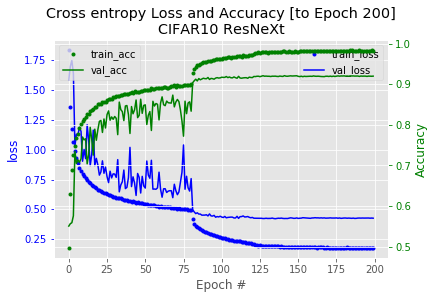

In [169]:
plot_learning_progress(hist, 'ResNeXt')

## Visualize the architecture (RERUN to see the latest version)
(RERUN to see the latest version)
<img src="model_plotResNeXt-Cifar10-v1.png" alt="Drawing" style="width: =1200px;"/>


# TASK: Experiment: Tackling CIFAR100  (One hundred) with ResNeXt (OPTIONAL TASK)

Using the [ResNeXt implementation here](https://github.com/titu1994/Keras-ResNeXt)  train a network on the CIFAR100 dataset (with and without image augmentation). Please report your experimental results using the following format and contrast and DISCUSS with respect to now augmentation,  along with various training progress plots and architecture diagrams::

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|
| ResNeXt|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|


In [ ]:
from __future__ import print_function
from __future__ import division

import os

import numpy as np
import sklearn.metrics as metrics
from keras import backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.datasets import cifar100
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from resnext import ResNeXt

batch_size = 32
nb_classes = 100
#nb_epoch = 100

img_rows, img_cols = 32, 32
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
depth = 29
cardinality = 8
width = 16

model = ResNeXt(img_dim, depth=depth, cardinality=cardinality, width=width, weights=None, classes=nb_classes)
print("Model created")
#plot_model(model, to_file='model_plotResNeXt-Cifar100.png', show_shapes=True, show_layer_names=True)
display_nn_model(model, 'model_plotResNeXt-Cifar100.png')

model.summary()

optimizer = Adam(lr=1e-3)  # Using Adam instead of SGD to speed up training
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
print("Finished compiling")
print("Building model...")

(trainX, trainY), (testX, testY) = cifar100.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.
testX /= 255.

Y_train = np_utils.to_categorical(trainY, nb_classes)
Y_test = np_utils.to_categorical(testY, nb_classes)

generator = ImageDataGenerator(rotation_range=15,
                               width_shift_range=5./32,
                               height_shift_range=5./32,
                               horizontal_flip=True)

generator.fit(trainX, seed=0)

out_dir = "weights/"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Load model
weights_file = "weights/ResNext-8-64d-CIFAR100.h5"

if os.path.exists(weights_file):
    model.load_weights(weights_file)
    print("Model loaded.")

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1),
                               cooldown=0, patience=10, min_lr=1e-6)

model_checkpoint = ModelCheckpoint(weights_file, monitor="val_acc", save_best_only=True,
                                   save_weights_only=True, mode='auto')

callbacks = [lr_reducer, model_checkpoint]

hist = model.fit_generator(generator.flow(trainX, Y_train, batch_size=batch_size),
                    steps_per_epoch=len(trainX) // batch_size,
                    epochs=nb_epoch,
                    callbacks=callbacks,
                    validation_data=(testX, Y_test),
                    validation_steps=testX.shape[0] // batch_size, verbose=1)

yPreds = model.predict(testX)
yPred = np.argmax(yPreds, axis=1)
yTrue = testY

accuracy = metrics.accuracy_score(yTrue, yPred) * 100
error = 100 - accuracy
print("Accuracy : ", accuracy)
print("Error : ", error)

## Plot learning progress

<Figure size 432x288 with 0 Axes>

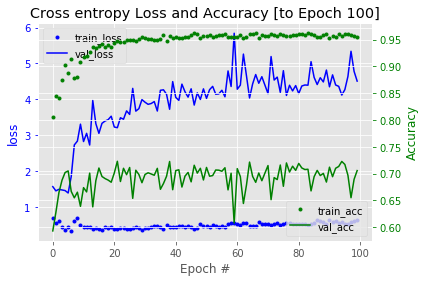

In [96]:
plot_learning_progress(hist, 'ResNeXt-Cifar100')

## Visualize the architecture (RERUN to see the latest version)
(RERUN to see the latest version)
<img src="model_plotResNeXt-Cifar100-v1.png" alt="Drawing" style="width: =1200px;"/>


End of notebook